<a href="https://colab.research.google.com/github/BhargavSG-DS/C-Cpp-Data-Structures-and-Algorithms/blob/main/PD_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary libraries

In [ ]:
# Data Libs
import numpy as np
import pandas as pd
from openpyxl import load_workbook

# Classification Metrics
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,f1_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

# Classification Models Classes
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from keras.models import Sequential
from keras.layers import Dense

# Preprocessing lib
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Visual lib
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
modelN1 = 'LogisticClassifier'
modelN2 = 'GaussianNBClassifier'
modelN3 = 'DecisionTreeClassifier'
modelN4 = 'RandomForestClassifier'
modelN5 = 'SupportVectorClassifier'
modelN6 = 'KNClassifier'
modelN7 = 'SGDClassifier'
modelN8 = 'KernalApproximationSGDClassifier'
modelN9 = 'NeuralNetworkClassifier'

In [ ]:
class TheClassifier:
    def __init__(self,dataset,sheet_name) -> None:
        self.sheet_name = sheet_name
        self.dataset = dataset
        avgOfColumn = dataset.iloc[:,-1].mean()
        if sheet_name == "Length":
            dataset['Length'] = dataset.apply(lambda row: 0 if row[-1] >= avgOfColumn else 1, axis = 1)
        elif sheet_name == "Breadth":
            dataset['Breadth'] = dataset.apply(lambda row: 0 if row[-1] >= avgOfColumn else 1, axis = 1)
        elif sheet_name == "Height":
            dataset['Height'] = dataset.apply(lambda row: 0 if row[-1] >= avgOfColumn else 1, axis = 1)
        else:
            pass

        self.X,self.y =  dataset.iloc[:,1:-1],dataset.iloc[:,-1]

        self.LogC = LogisticRegression(random_state=0)
        self.GNBC = GaussianNB()
        self.DTC = DecisionTreeClassifier(random_state=0)
        self.RFC = RandomForestClassifier(max_depth=2, random_state=0)
        self.SVCls = make_pipeline(StandardScaler(), SVC(gamma='auto'))
        self.KNC = KNeighborsClassifier(n_neighbors=3)
        self.SGDC = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
        kernal = RBFSampler(gamma=1, random_state=1)
        self.KASGDC = SGDClassifier(max_iter=5)

        self.NN = Sequential()
        self.NN.add(Dense(units=6, activation='relu'))
        # Second Hidden layer
        self.NN.add(Dense(units=6, activation='relu'))
        # Output layer
        self.NN.add(Dense(units=1, activation='sigmoid'))
        self.NN.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

    def find_corr(self):
        self.corr = self.dataset.corr()
        plt.figure(figsize=(20,9))
        hm = sns.heatmap(self.corr,cmap='crest',annot=True,fmt='.2f')
        plt.savefig(self.sheet_name+'ClassificationCorrelationHeatmap.png',bbox_inches="tight")

    def process_dataset(self,split_size = 0.3):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = split_size, random_state = 1)
        self.X_test,self.y_test = X_test,y_test

        # Logistic Prediction
        self.LogC.fit(X_train,y_train)
        self.LogC_y_pred = self.LogC.predict(X_test)
        self.model_scores(y_pred_test=self.LogC_y_pred,model_name=modelN1)

        # GaussianNB Prediction
        self.GNBC.fit(X_train,y_train)
        self.GNBC_y_pred = self.GNBC.predict(X_test)
        self.model_scores(y_pred_test=self.GNBC_y_pred,model_name=modelN2)

        # Decision Tree Prediction
        self.DTC.fit(X_train,y_train)
        self.DTC_y_pred = self.DTC.predict(X_test)
        self.model_scores(y_pred_test=self.DTC_y_pred,model_name=modelN3)

        # Random Forest Prediction
        self.RFC.fit(X_train,y_train)
        self.RFC_y_pred = self.RFC.predict(X_test)
        self.model_scores(y_pred_test=self.RFC_y_pred,model_name=modelN4)

        # Support Vector Prediction
        self.SVCls.fit(X_train, y_train)
        self.SVCls_y_pred = self.SVCls.predict(X_test)
        self.model_scores(y_pred_test=self.SVCls_y_pred,model_name=modelN5)

        # KNN Prediction
        self.KNC.fit(X_train,y_train)
        self.KNC_y_pred = self.KNC.predict(X_test)
        self.model_scores(y_pred_test=self.KNC_y_pred,model_name=modelN6)

        # Stochastic Gradient Descent Prediction
        self.SGDC.fit(X_train,y_train)
        self.SGDC_y_pred = self.SGDC.predict(X_test)
        self.model_scores(y_pred_test=self.SVCls_y_pred,model_name=modelN7)

        # Kernal Approximation with SGD Prediction
        rbf = RBFSampler(gamma=1, random_state=1)
        rbfX_train = rbf.fit_transform(X_train)
        self.KASGDC.fit(rbfX_train, y_train)
        rbfX_test = rbf.fit_transform(X_test)
        self.KASGDC_y_pred = self.KASGDC.predict(rbfX_test)
        self.model_scores(y_pred_test=self.KASGDC_y_pred,model_name=modelN8)

        # Neural Network Prediction
        sc = StandardScaler()
        Conv_X_train = sc.fit_transform(X_train)
        Conv_X_test = sc.transform(X_test)
        self.NN.fit(Conv_X_train, y_train,epochs=30,verbose=0)
        self.NN_y_pred = self.NN.predict(Conv_X_test) > 0.5
        self.model_scores(y_pred_test=self.NN_y_pred,model_name=modelN9)

    def model_scores(self, y_pred_test, model_name:str):
        CR = classification_report(self.y_test, y_pred_test,output_dict=True,zero_division=1)
        _f1_score = f1_score(self.y_test, y_pred_test, average='binary')
        Specifivity_score = specificity_score(self.y_test, y_pred_test)
        AUC_ROC = roc_auc_score(self.y_test, y_pred_test)

        print("Specificity: ", Specifivity_score)
        print("AOC_ROC: ", AUC_ROC)

        fpr, tpr, _ = roc_curve(self.y_test,  y_pred_test)

        #create ROC curve
        plt.figure(figsize=(20,9))
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.title(model_name + ' Model ROC')
        plt.savefig(model_name + ' ROC.png')

        conmat = confusion_matrix(self.y_test, y_pred_test)
        val = np.mat(conmat)

        classnames = list(set(self.y_test))

        df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

        plt.figure()

        heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

        heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

        heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

        plt.text(0, 2.5, "F1_Score = "+str(format(_f1_score,'.2')), fontsize=10,horizontalalignment ='left')
        plt.text(0, 2.6, "Specificity = " + str(Specifivity_score), fontsize=10)
        plt.text(0, 2.7, "AUC ROC = " + str(format(AUC_ROC,'.2%')), fontsize=10)

        plt.ylabel('True label')

        plt.xlabel('Predicted label')

        plt.title(model_name+' Model Results')

        plt.savefig(model_name+' Validation Results.png',bbox_inches="tight")

    def write_preds(self):
        predsheet = pd.DataFrame(self.X_test)
        predsheet["True "+self.sheet_name + " Class"] = self.y_test
        predsheet[modelN1] = self.LogC_y_pred
        predsheet[modelN2] = self.GNBC_y_pred
        predsheet[modelN3] = self.DTC_y_pred
        predsheet[modelN4] = self.RFC_y_pred
        predsheet[modelN5] = self.SVCls_y_pred
        predsheet[modelN6] = self.KNC_y_pred
        predsheet[modelN7] = self.SGDC_y_pred
        predsheet[modelN8] = self.KASGDC_y_pred
        predsheet[modelN9] = self.NN_y_pred
        return predsheet

In [ ]:
L_datasheet = pd.read_excel("CompleteDataset.xlsx",sheet_name="Length")
B_datasheet = pd.read_excel("CompleteDataset.xlsx",sheet_name="Breadth")
H_datasheet = pd.read_excel("CompleteDataset.xlsx",sheet_name="Height")
dataset_dict = {"Length":L_datasheet,"Breadth":B_datasheet,"Height":H_datasheet}

Specificity:  0.5
AOC_ROC:  0.6071428571428572
Specificity:  0.5
AOC_ROC:  0.6071428571428572
Specificity:  0.5
AOC_ROC:  0.5357142857142857
Specificity:  0.5
AOC_ROC:  0.5357142857142857
Specificity:  0.5
AOC_ROC:  0.6071428571428572
Specificity:  0.5
AOC_ROC:  0.4642857142857143
Specificity:  0.5
AOC_ROC:  0.6071428571428572


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Specificity:  0.5
AOC_ROC:  0.5357142857142857
1/1 [==============================] - 0s 92ms/step
Specificity:  1.0
AOC_ROC:  0.8571428571428572
Specificity:  0.5
AOC_ROC:  0.41666666666666663


<ipython-input-23-f7b8eb2ee2b2>:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,9))


Specificity:  0.6666666666666666
AOC_ROC:  0.6666666666666667
Specificity:  0.3333333333333333
AOC_ROC:  0.33333333333333337
Specificity:  0.3333333333333333
AOC_ROC:  0.33333333333333337
Specificity:  0.3333333333333333
AOC_ROC:  0.33333333333333337
Specificity:  0.5
AOC_ROC:  0.5833333333333333
Specificity:  0.3333333333333333
AOC_ROC:  0.33333333333333337


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Specificity:  0.3333333333333333
AOC_ROC:  0.33333333333333337
1/1 [==============================] - 0s 77ms/step
Specificity:  0.5
AOC_ROC:  0.75
Specificity:  0.4
AOC_ROC:  0.45000000000000007
Specificity:  0.6
AOC_ROC:  0.5499999999999999
Specificity:  0.6
AOC_ROC:  0.675
Specificity:  0.4
AOC_ROC:  0.575
Specificity:  0.4
AOC_ROC:  0.575
Specificity:  0.6
AOC_ROC:  0.675
Specificity:  0.4
AOC_ROC:  0.575


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Specificity:  0.4
AOC_ROC:  0.575
1/1 [==============================] - 0s 67ms/step
Specificity:  0.4
AOC_ROC:  0.575


<ipython-input-25-87e182ee0ecb>:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


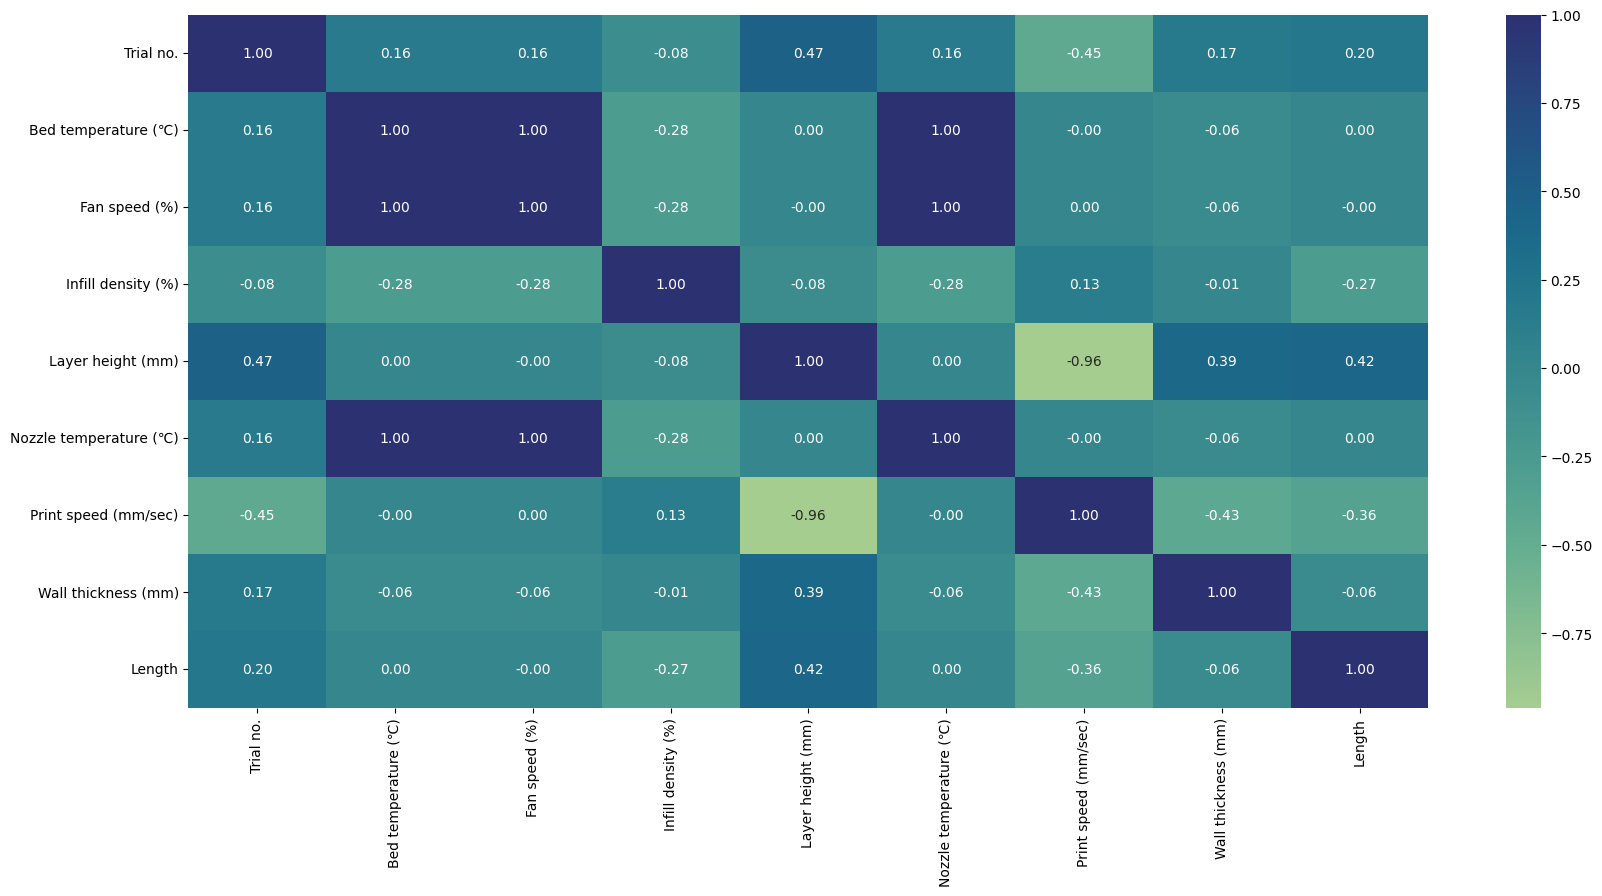

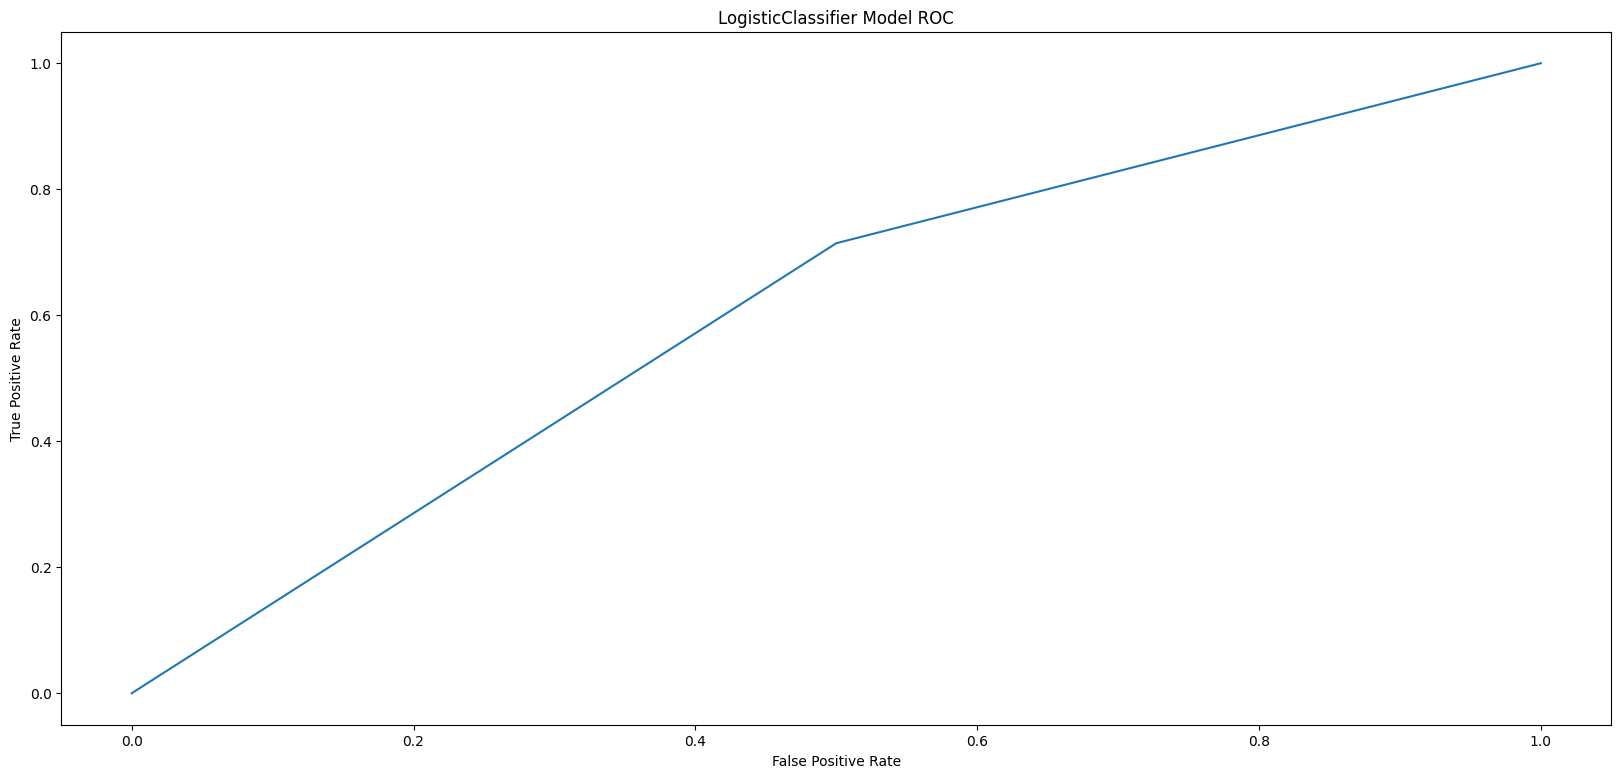

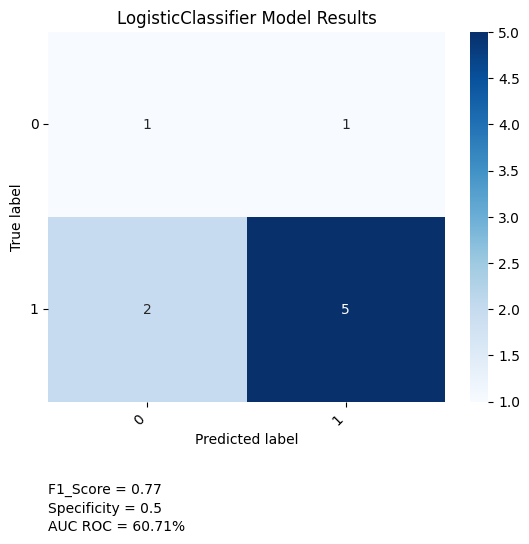

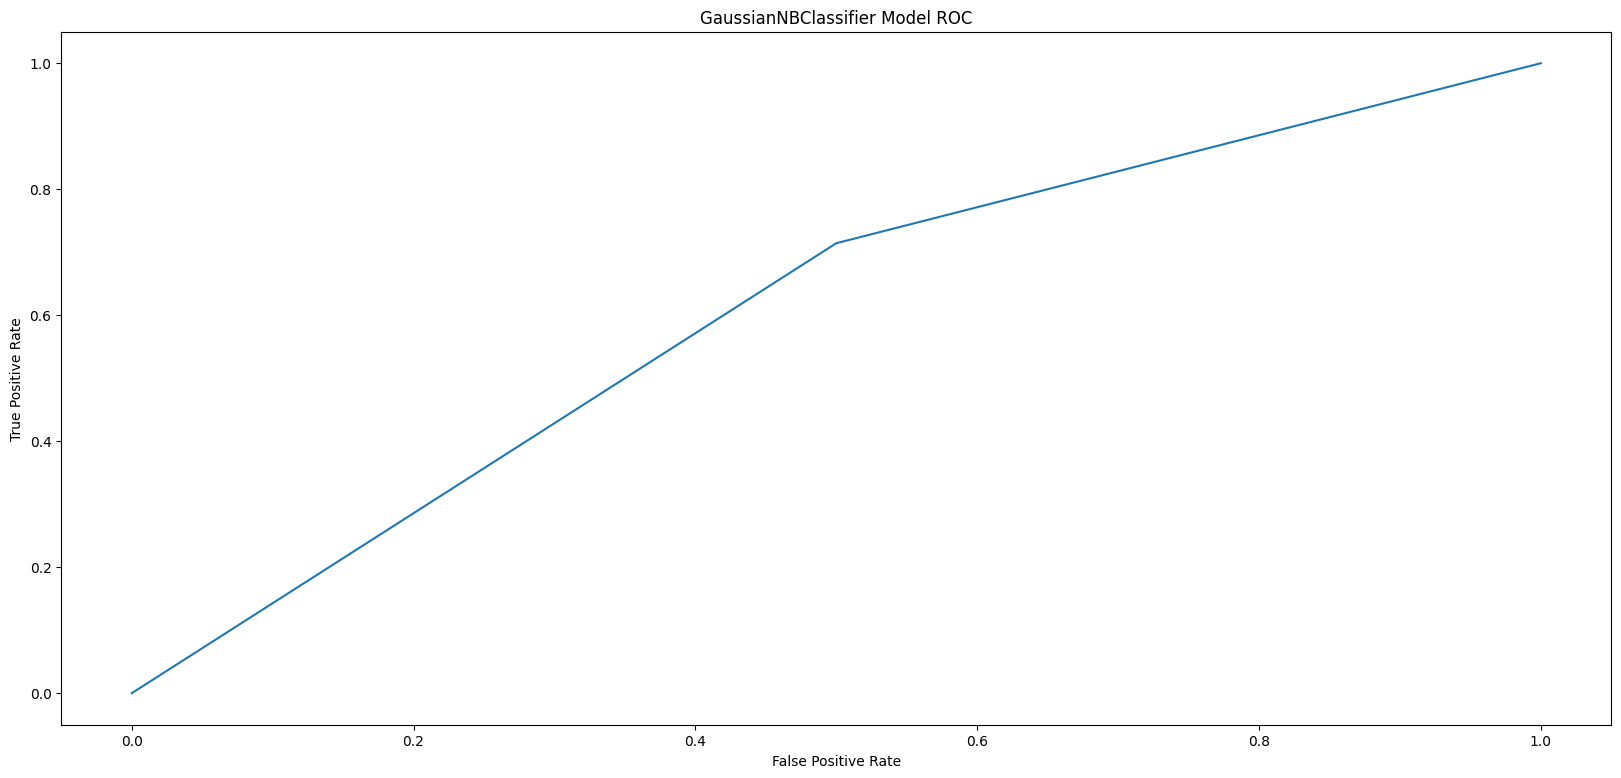

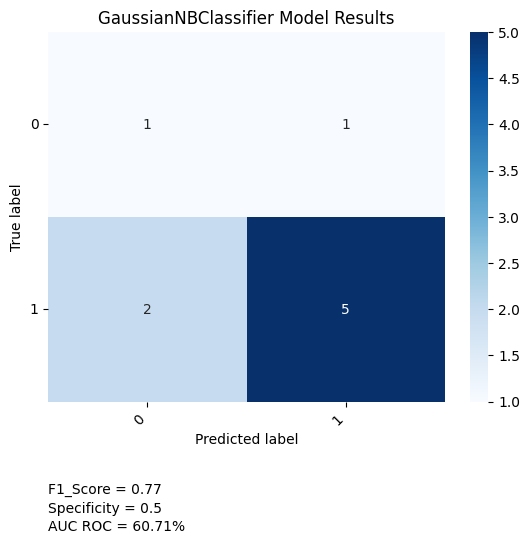

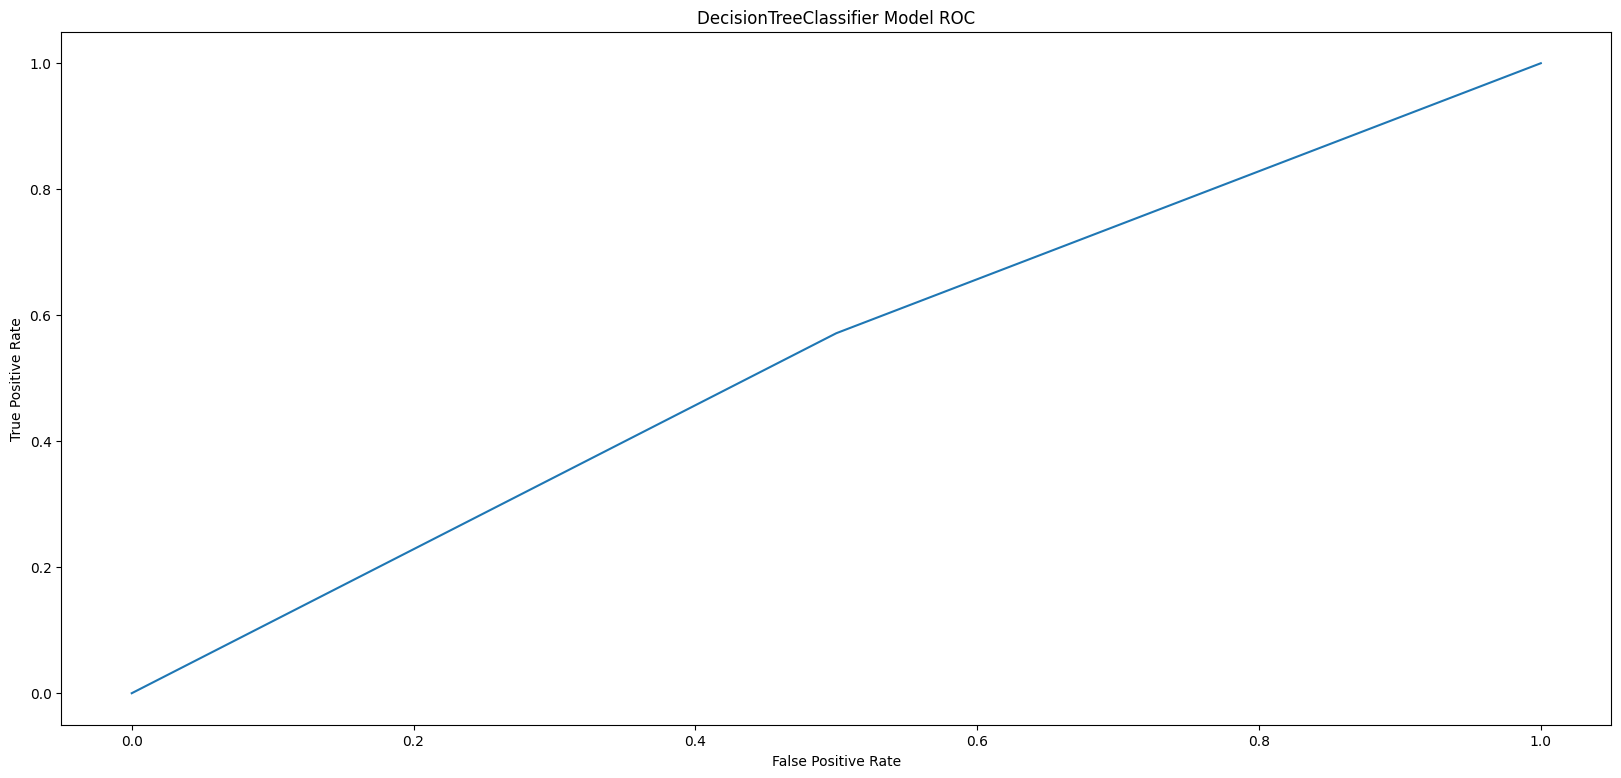

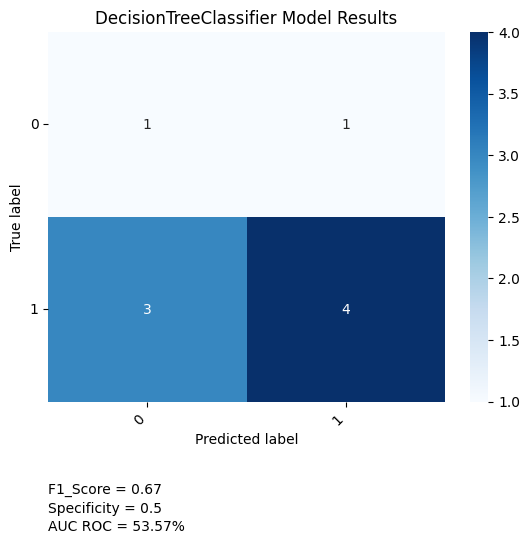

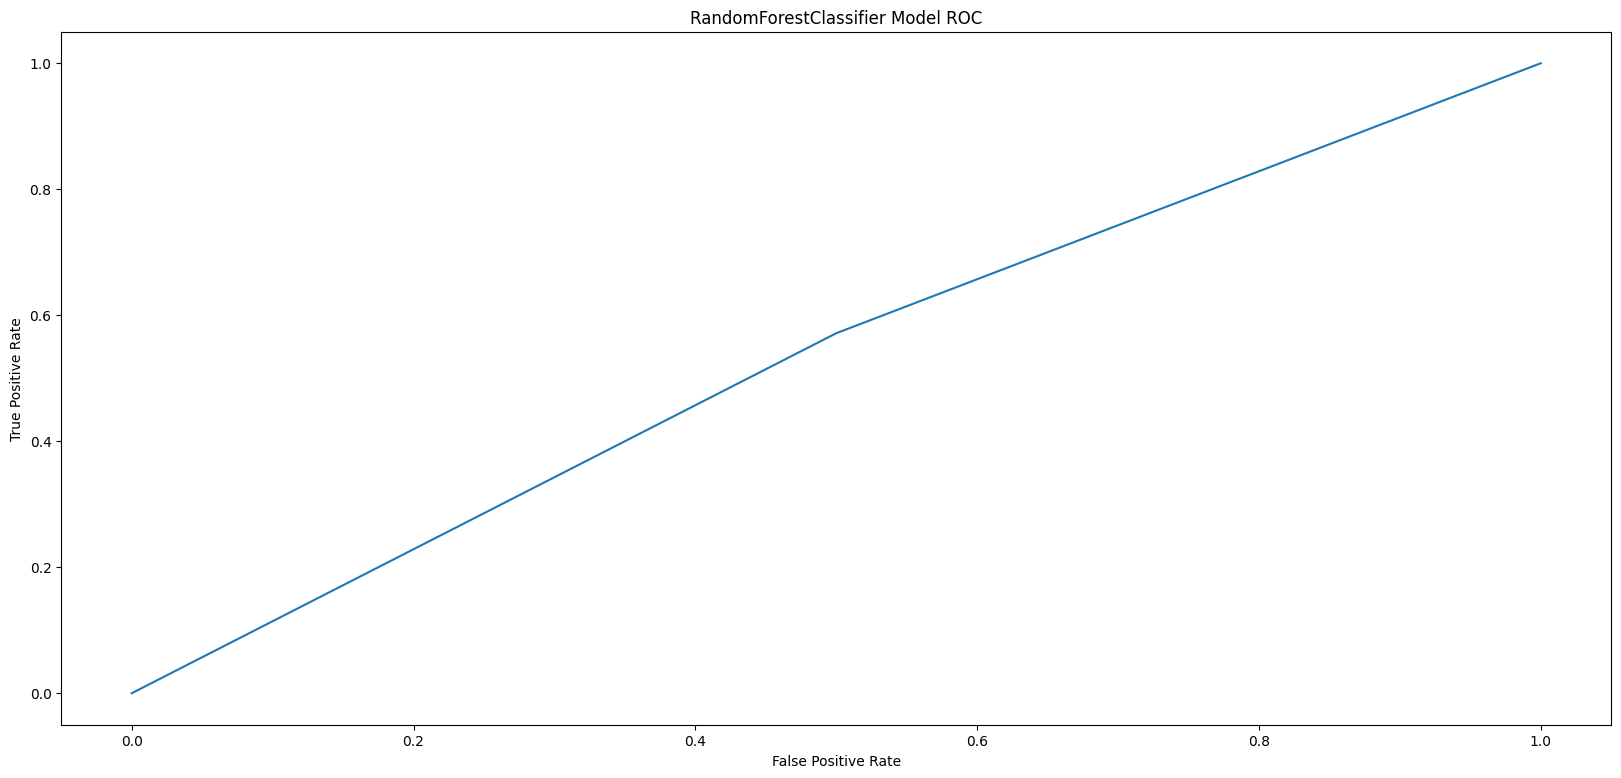

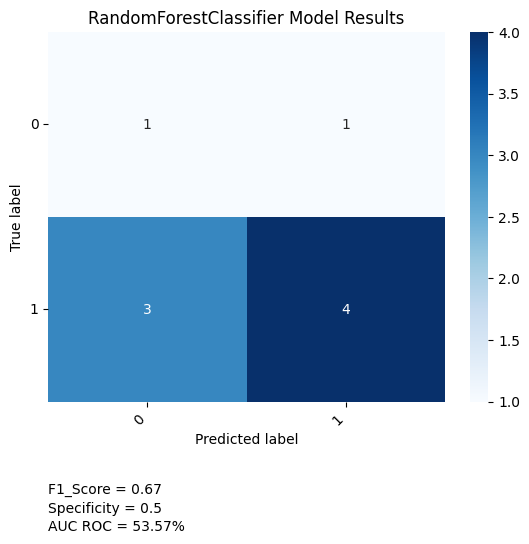

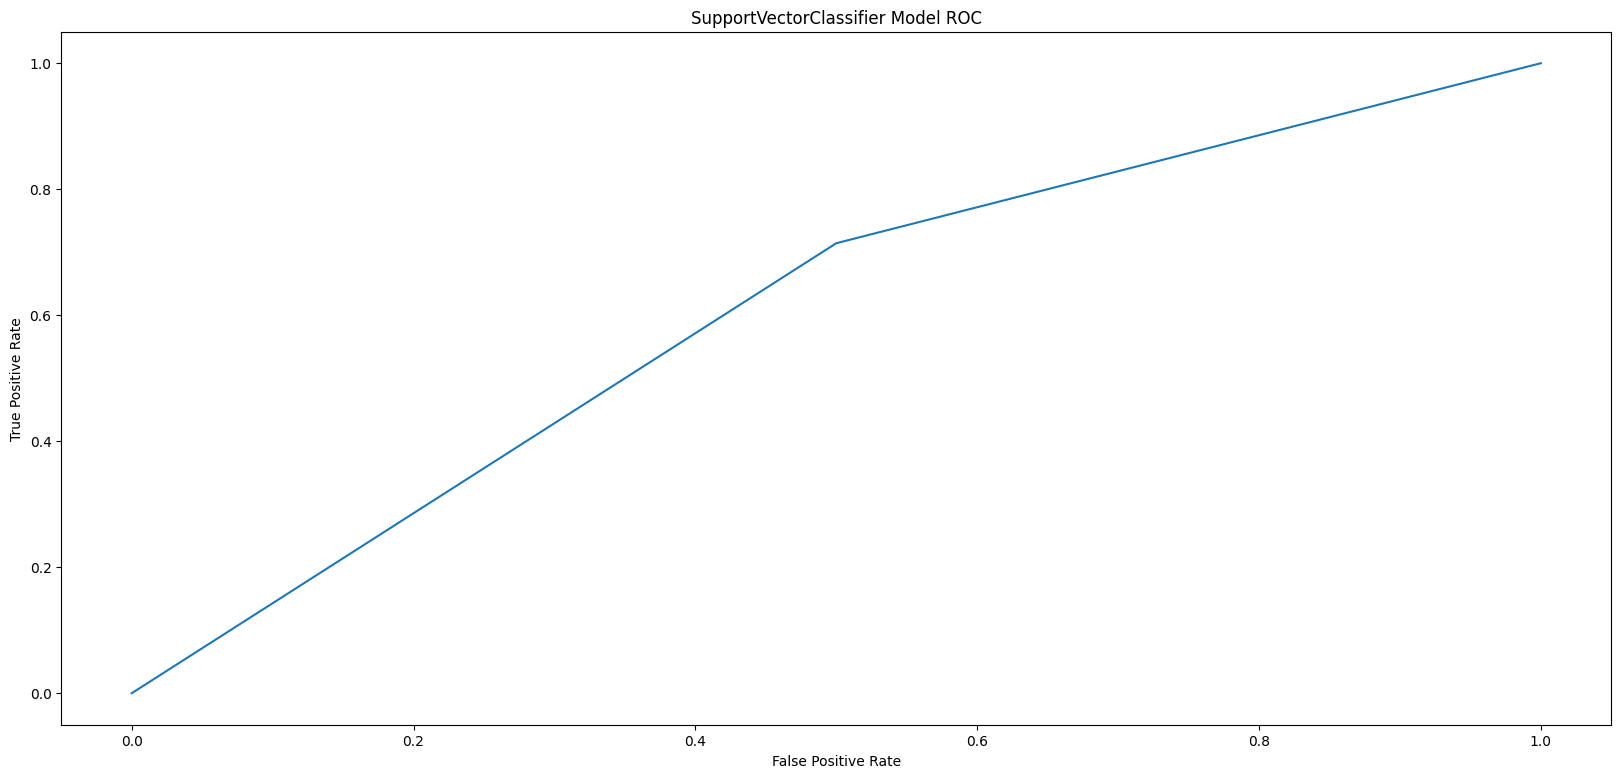

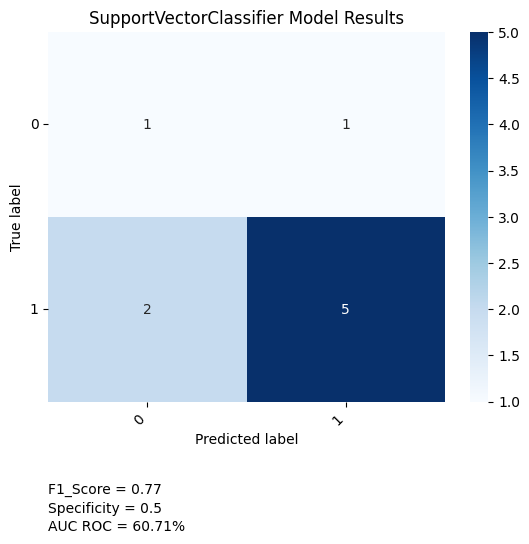

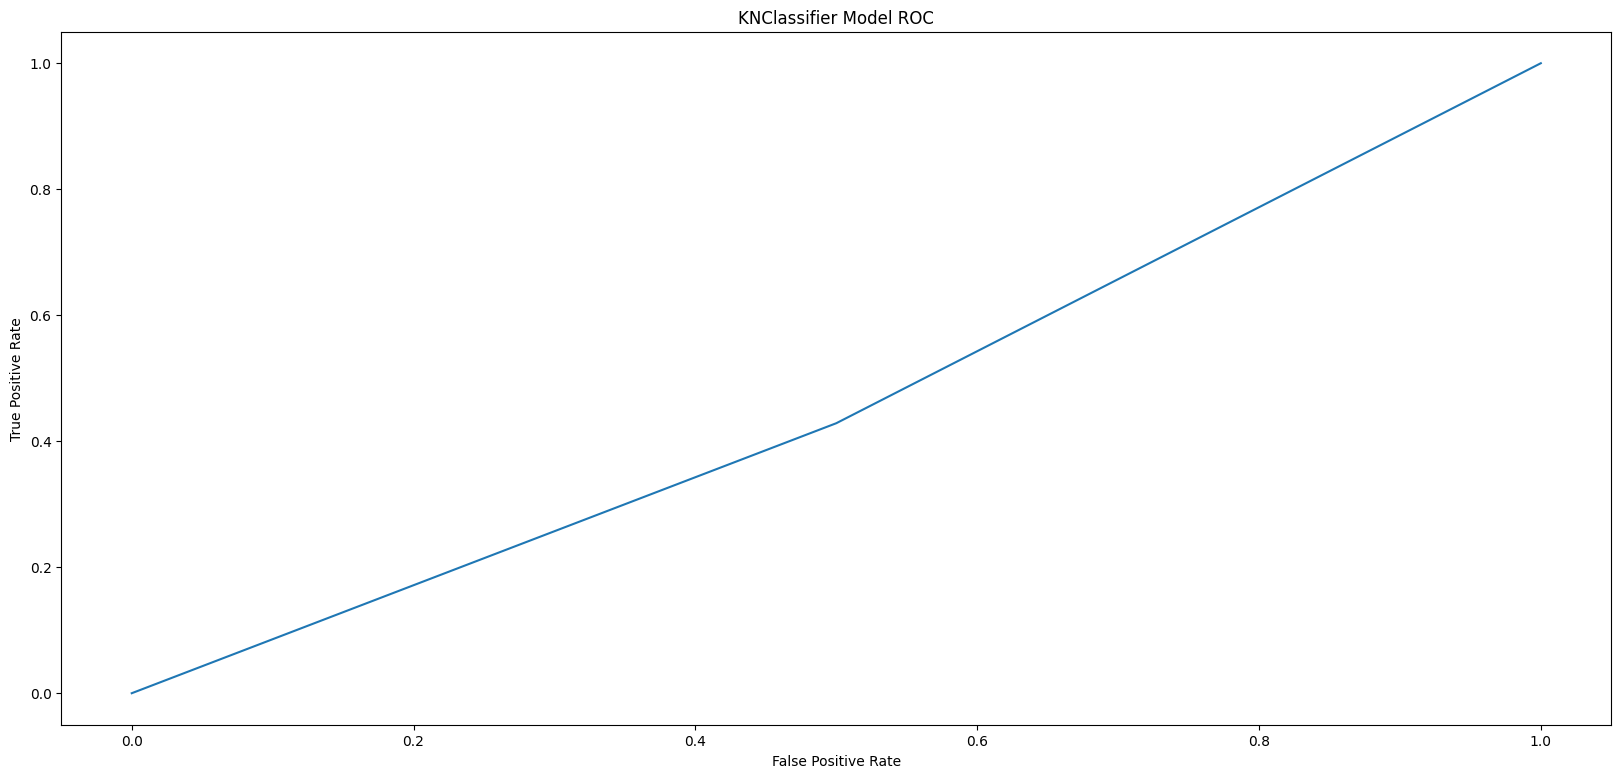

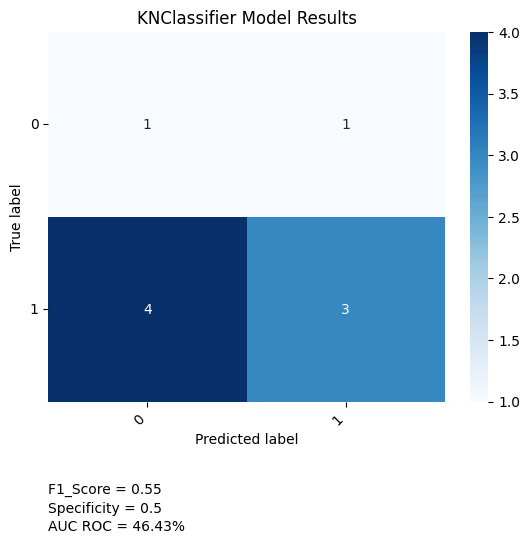

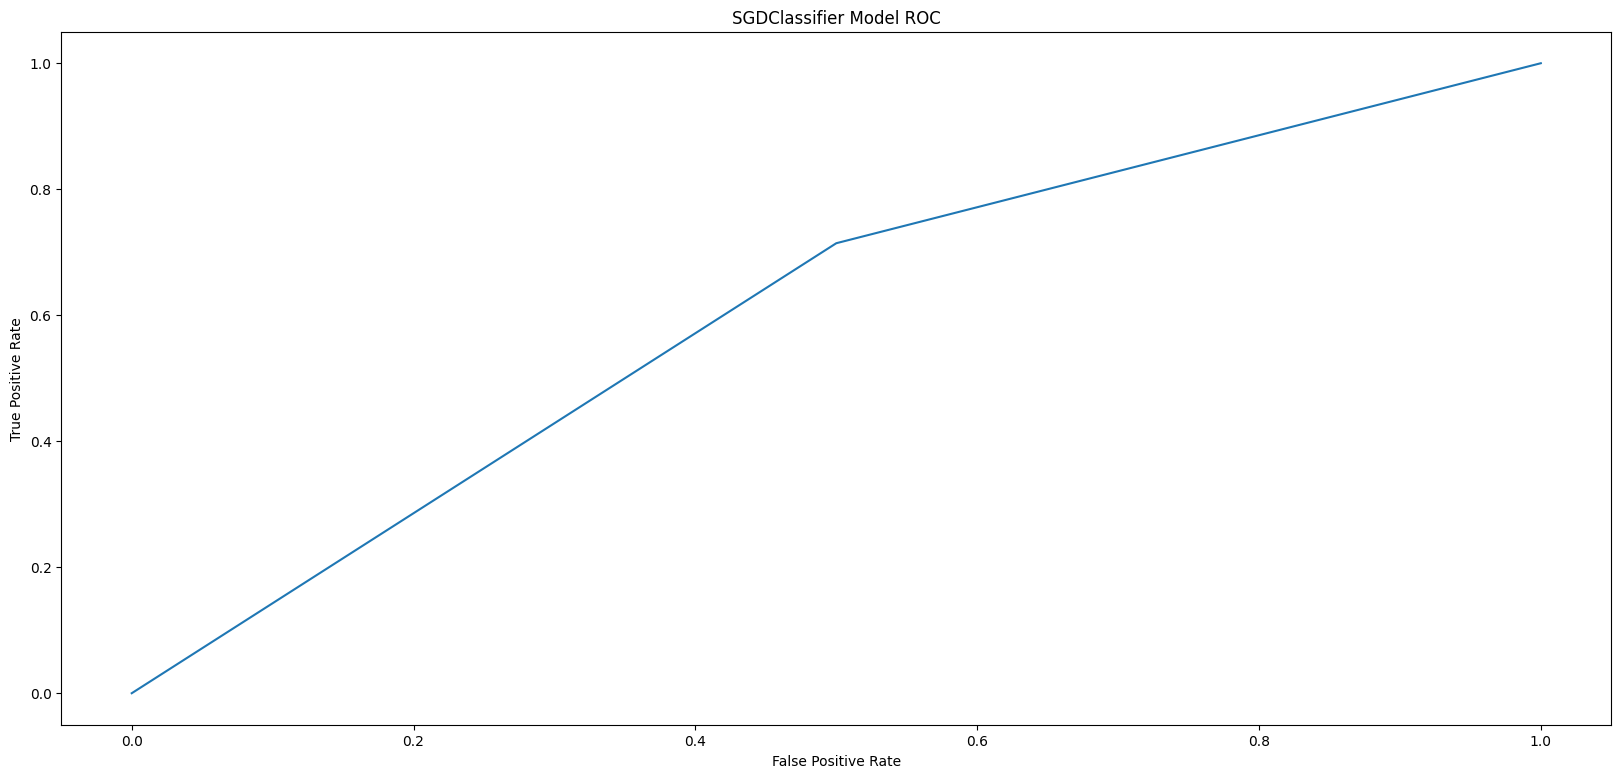

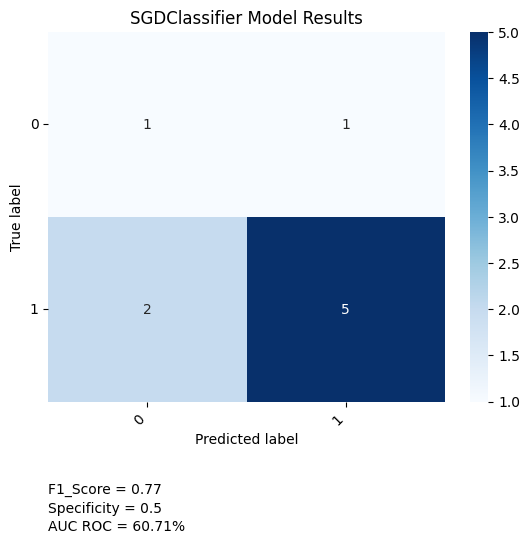

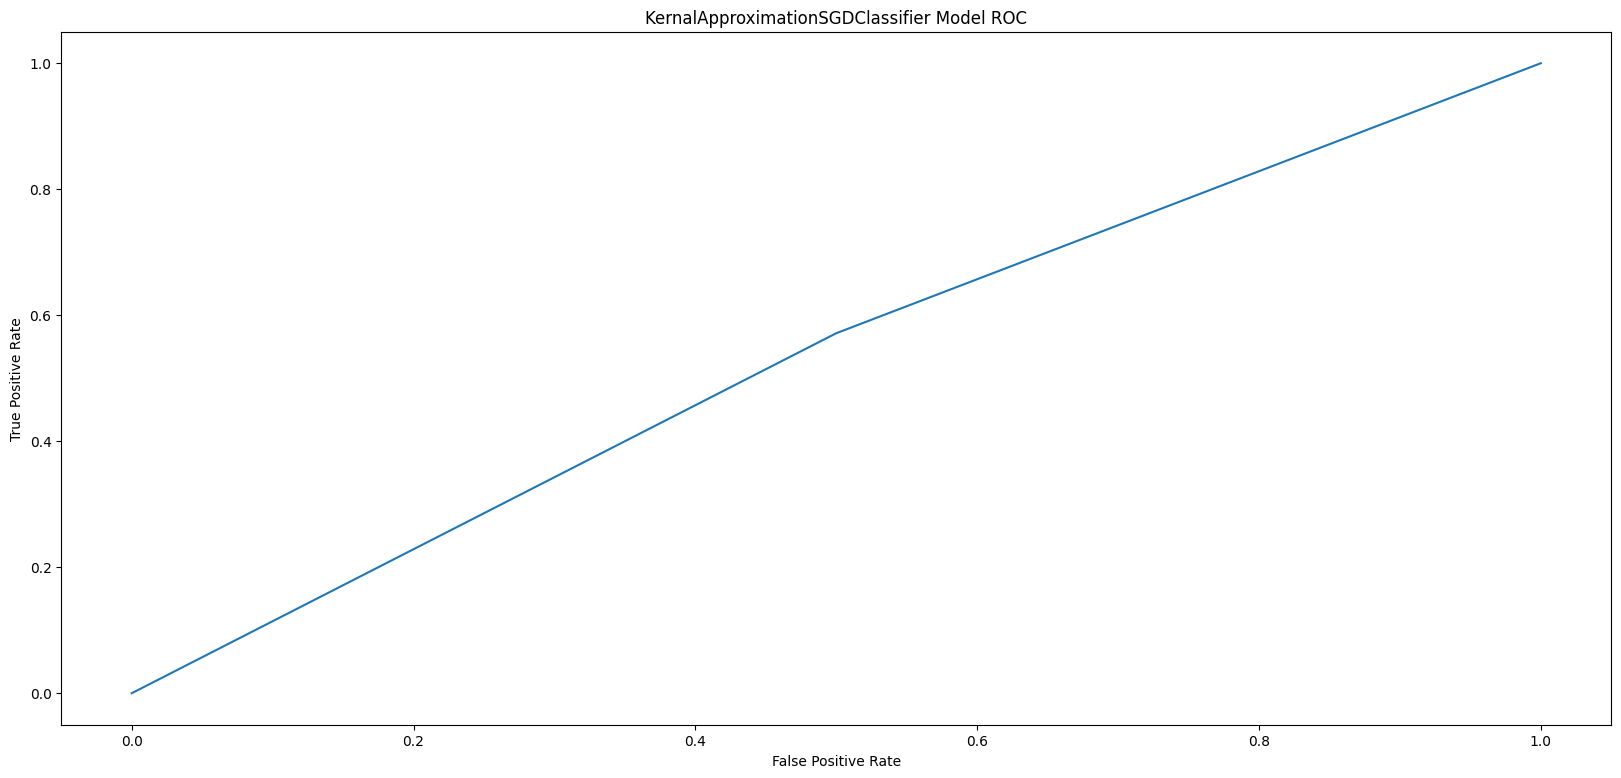

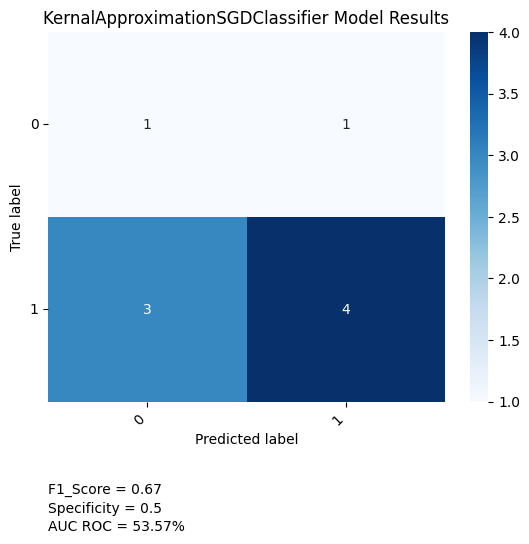

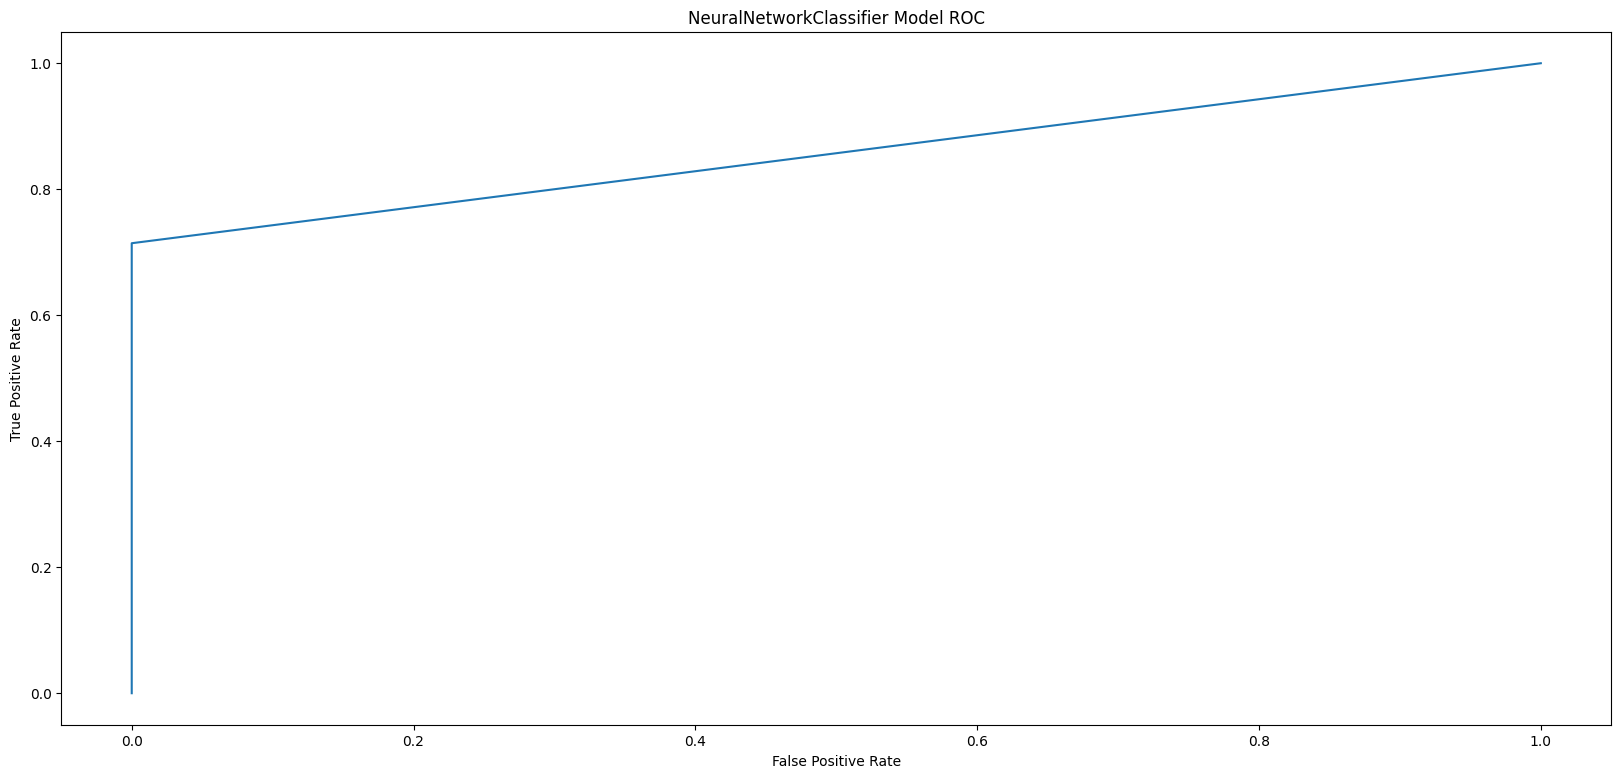

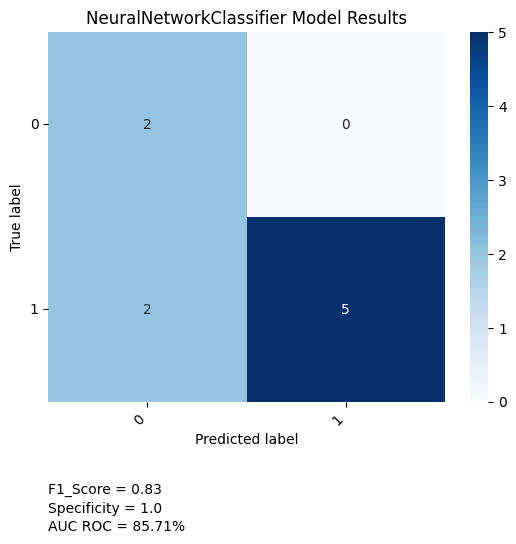

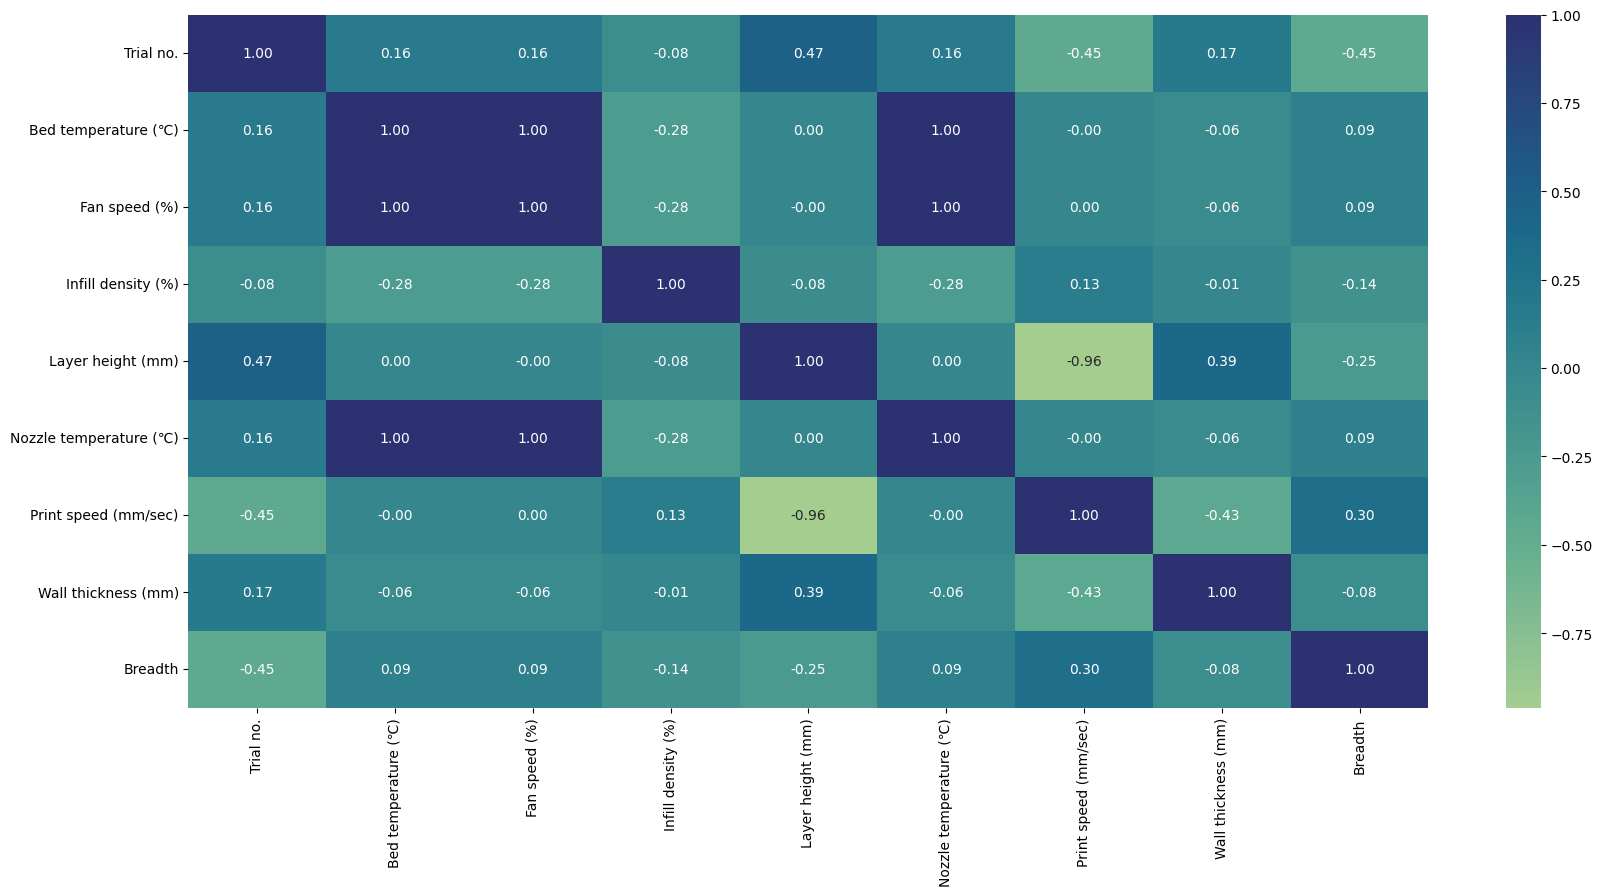

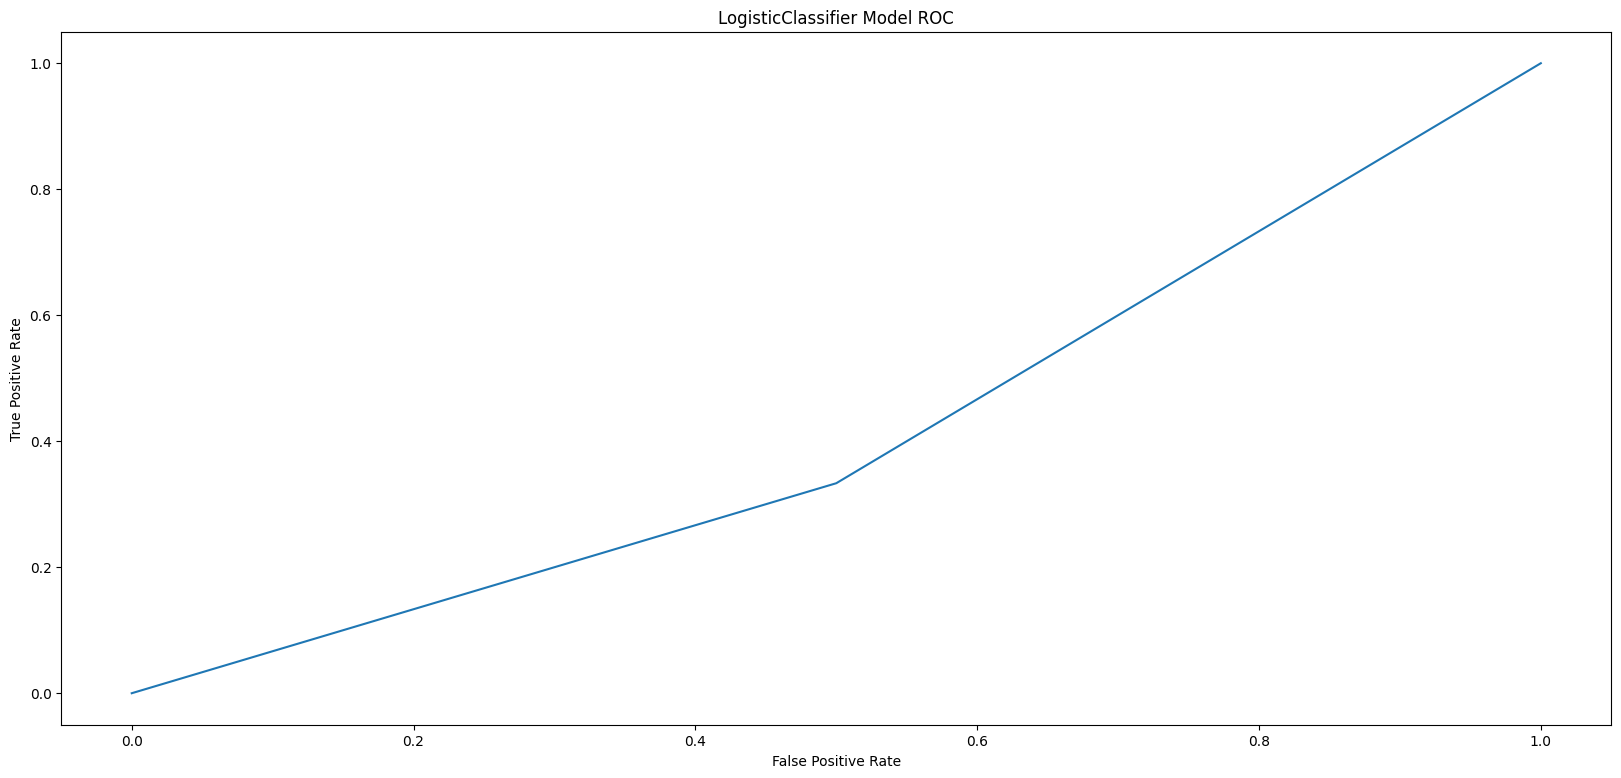

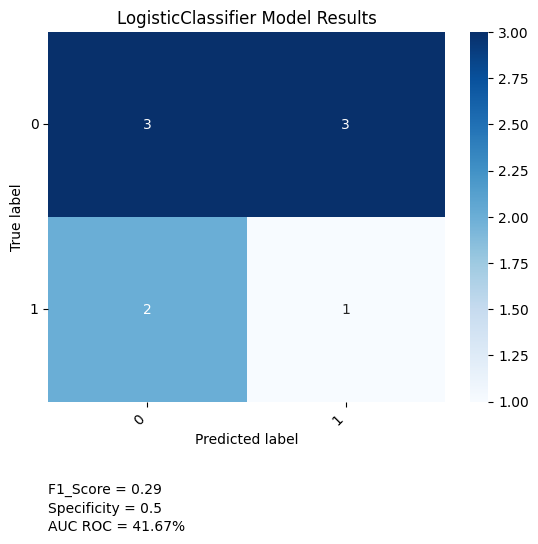

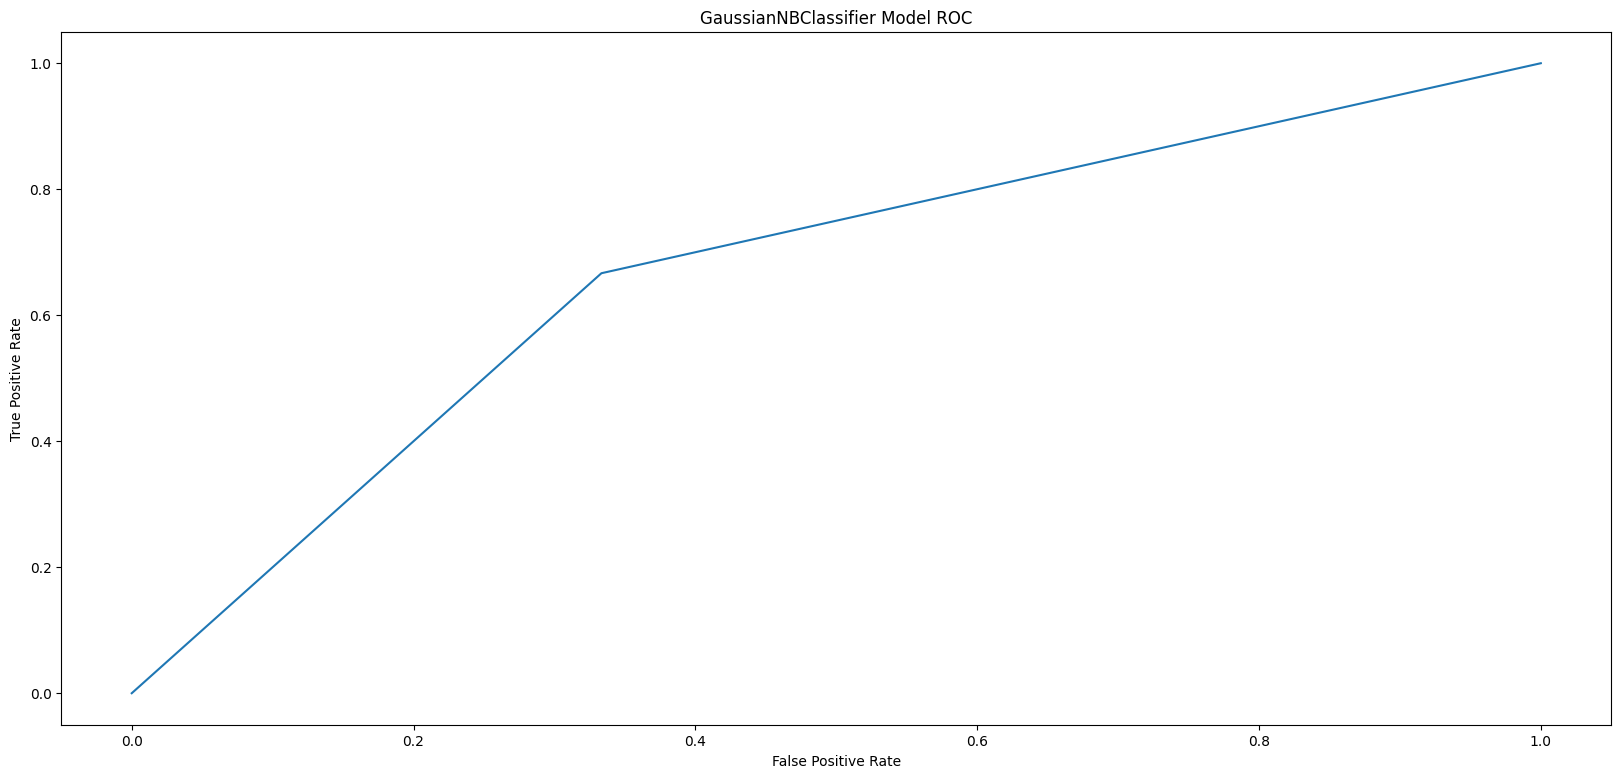

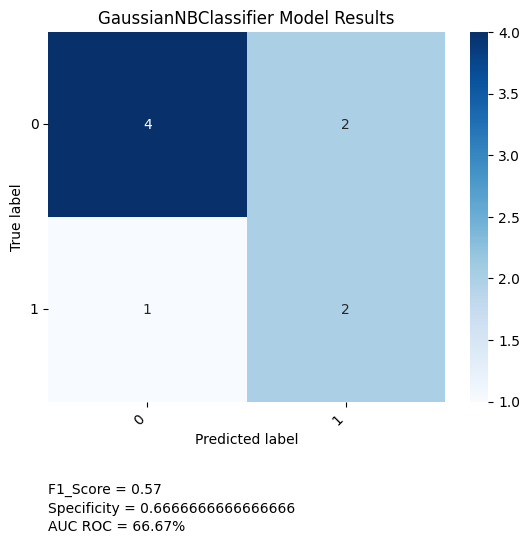

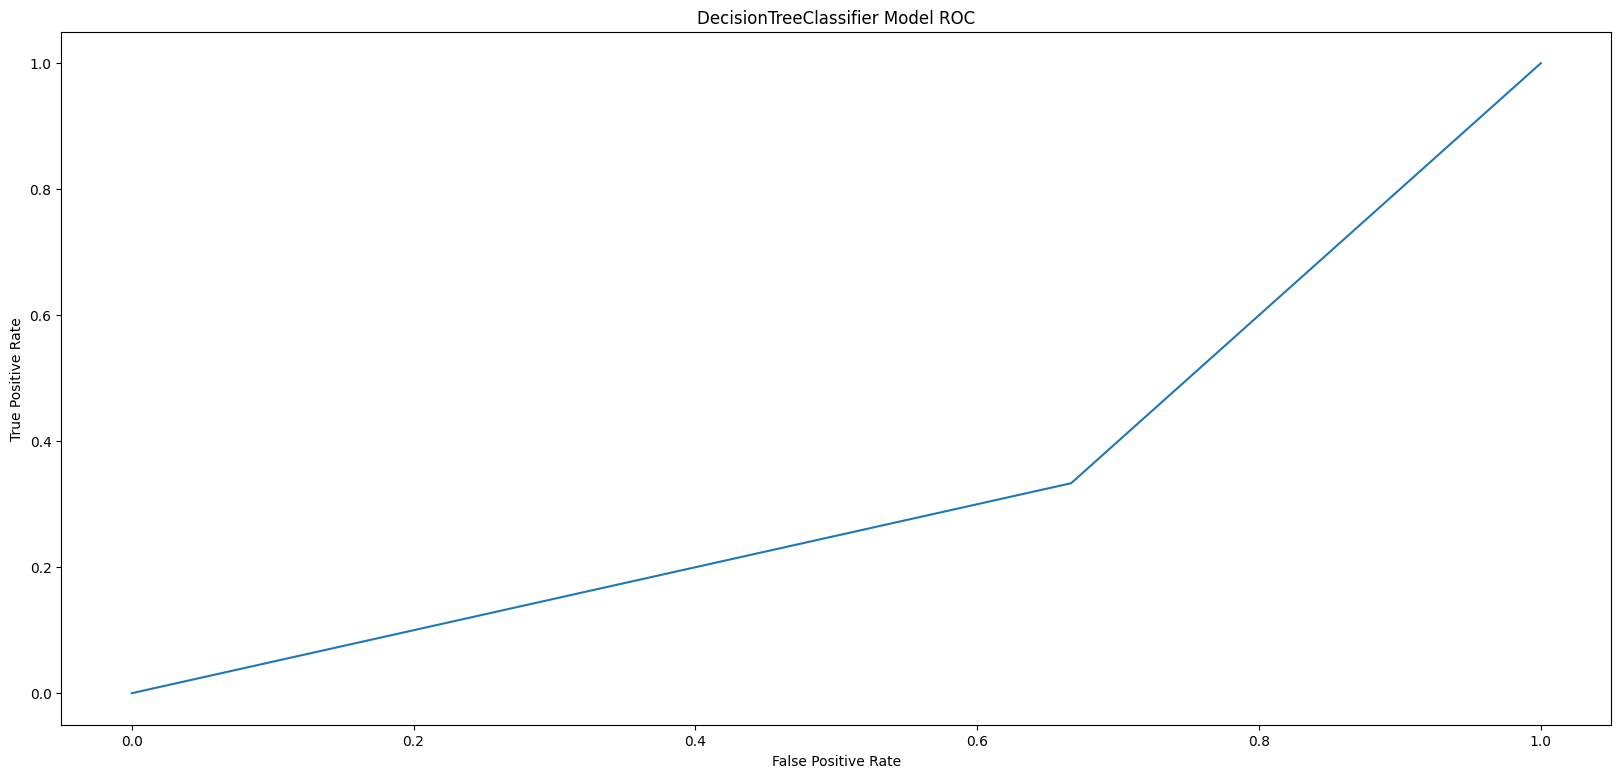

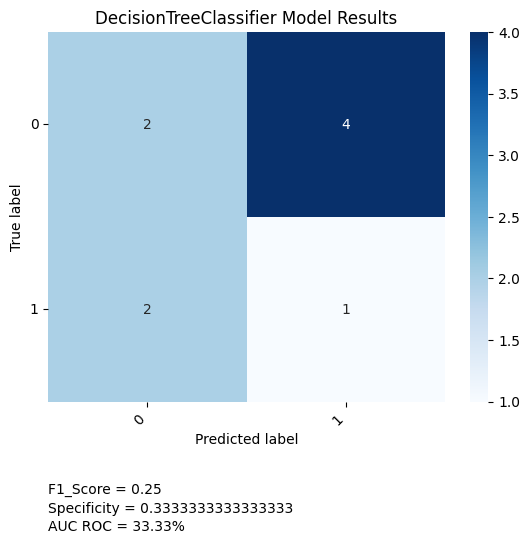

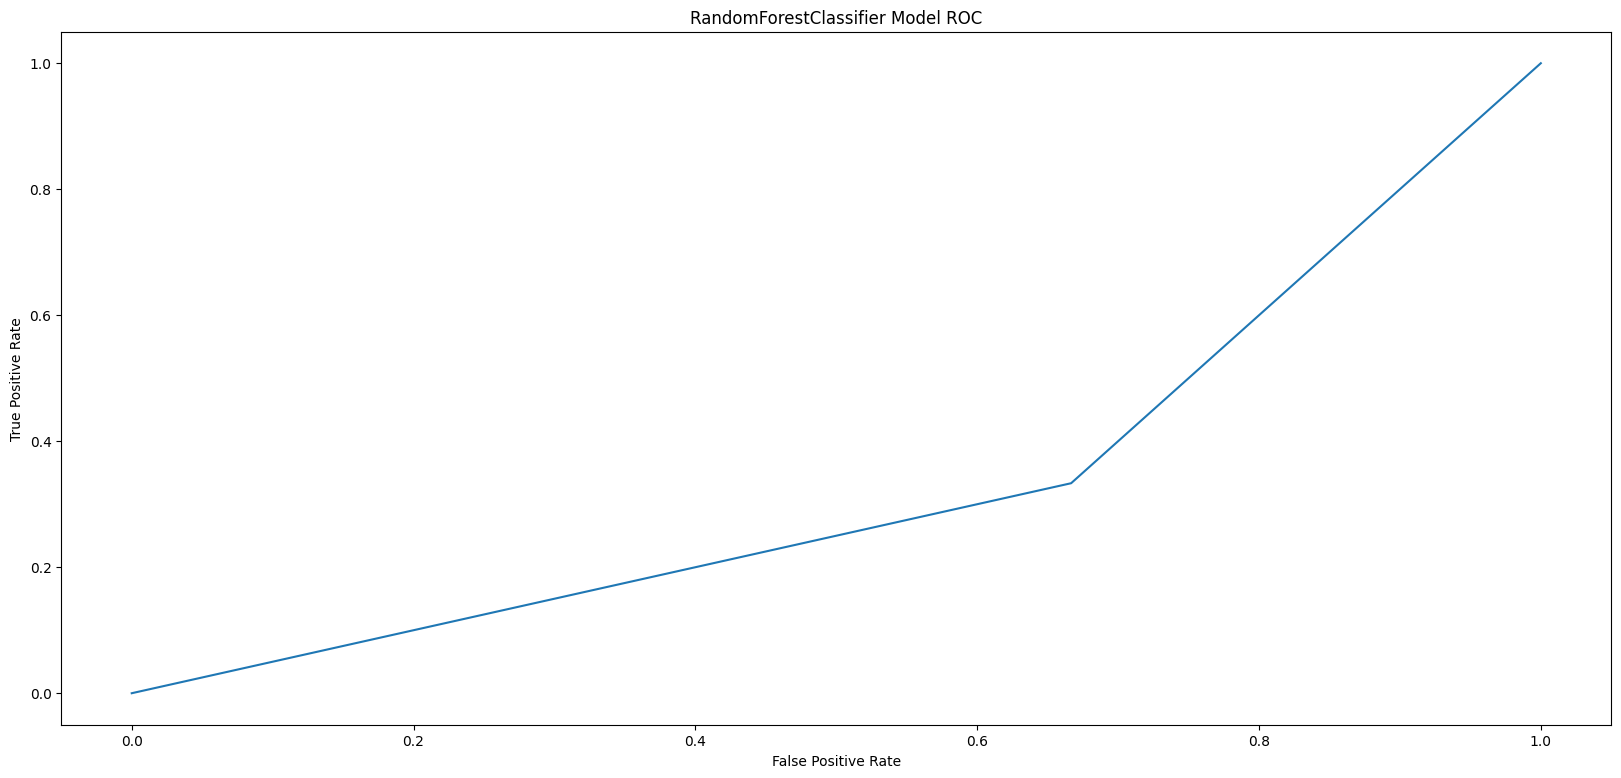

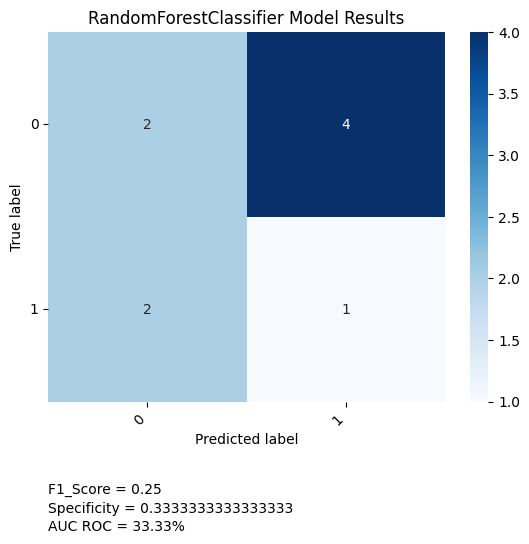

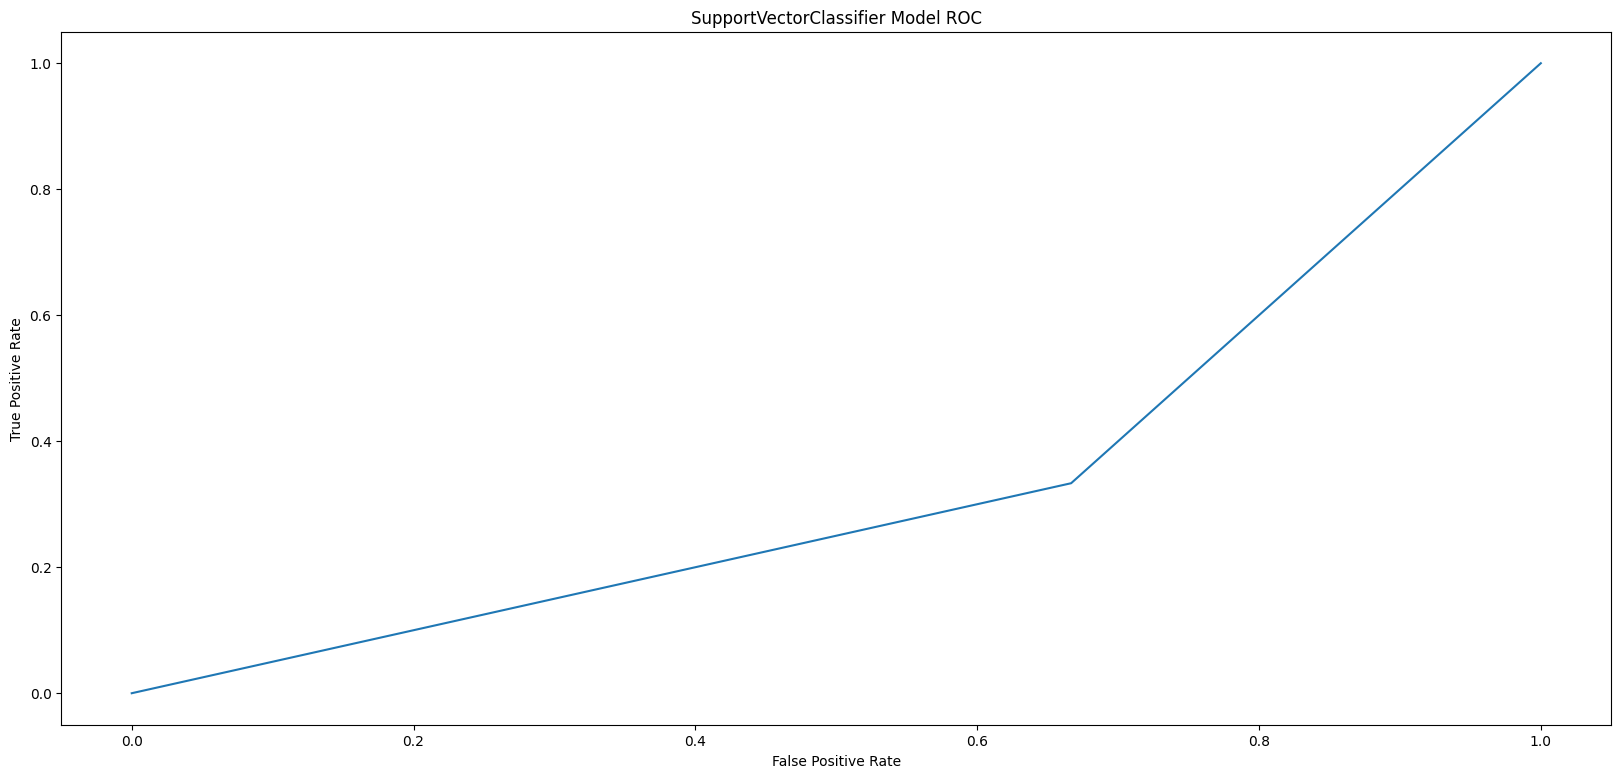

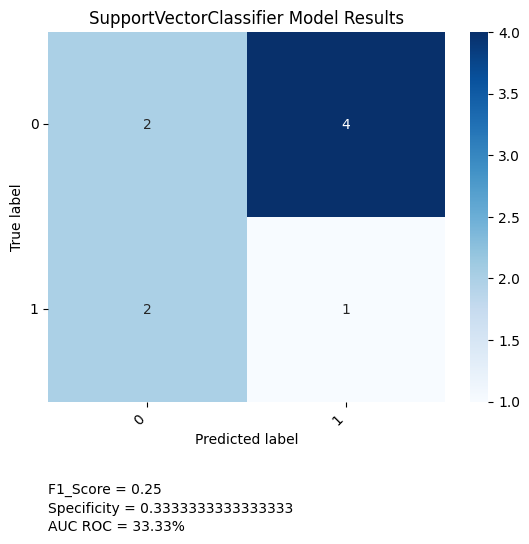

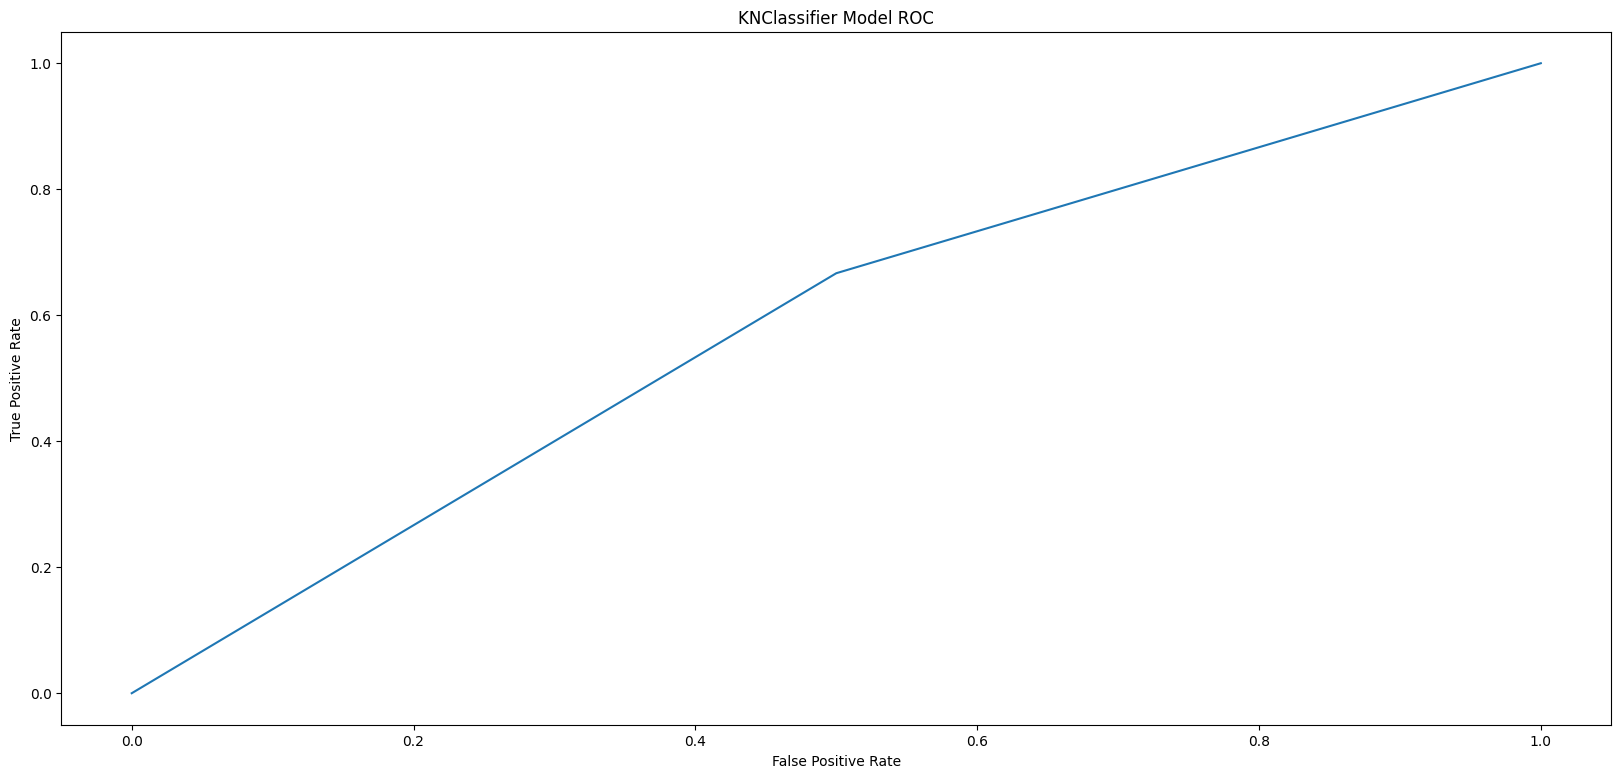

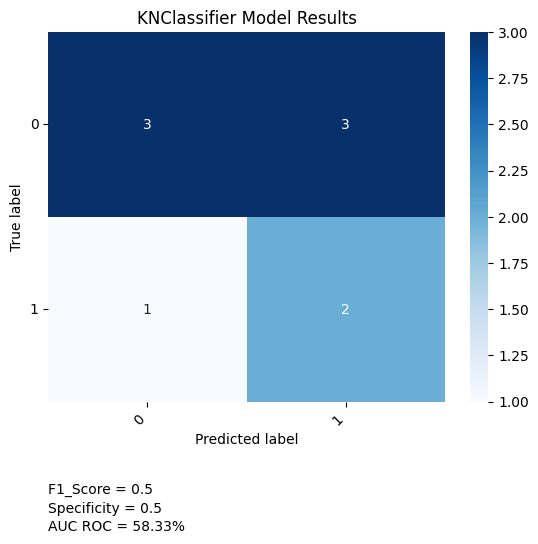

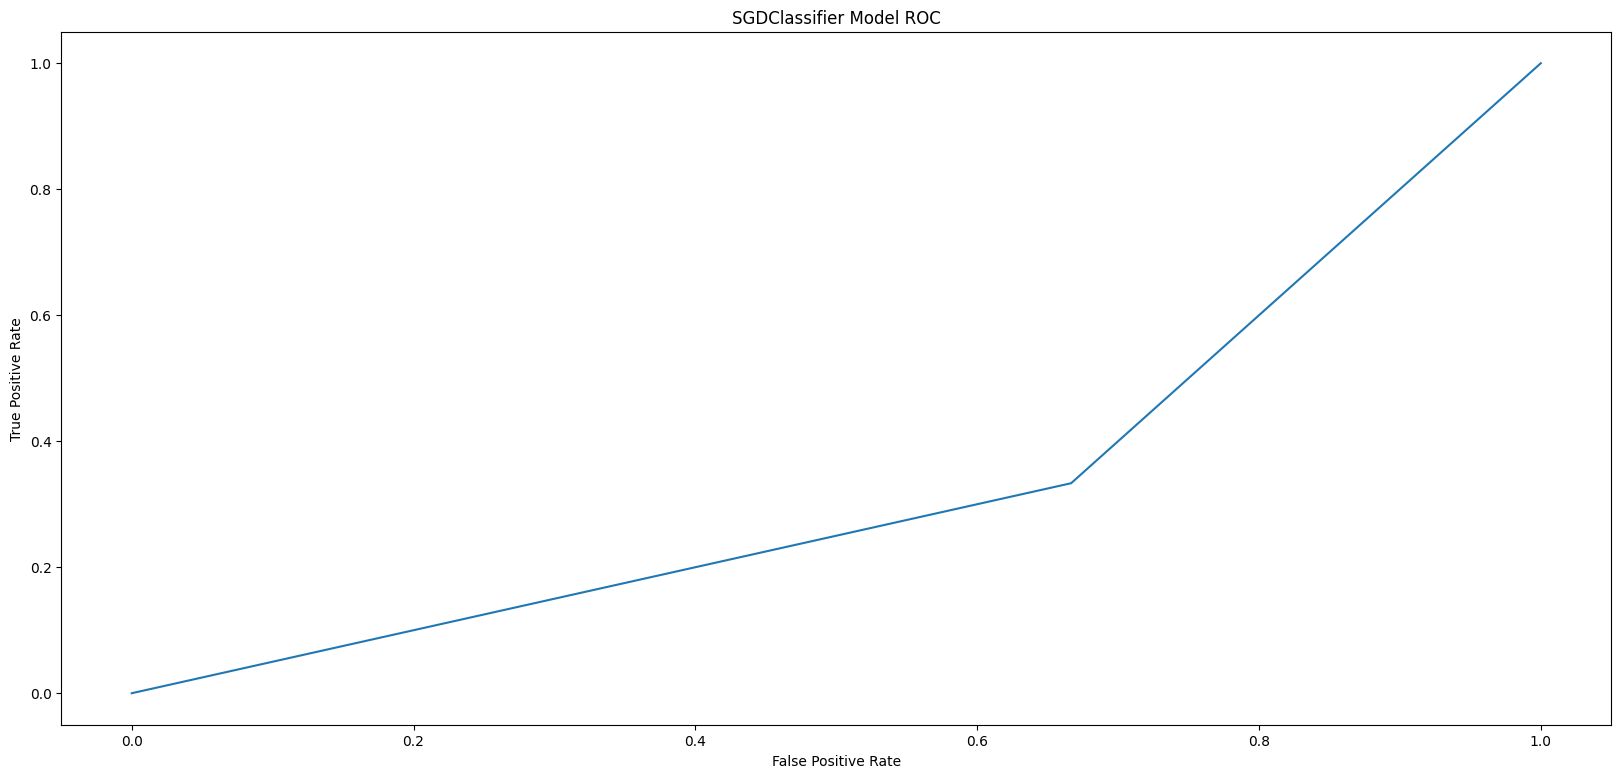

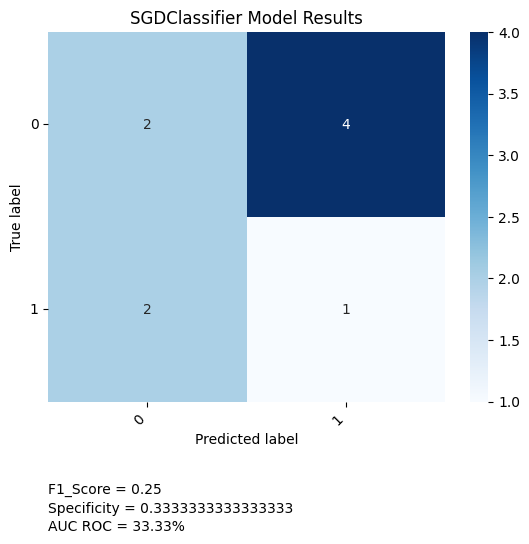

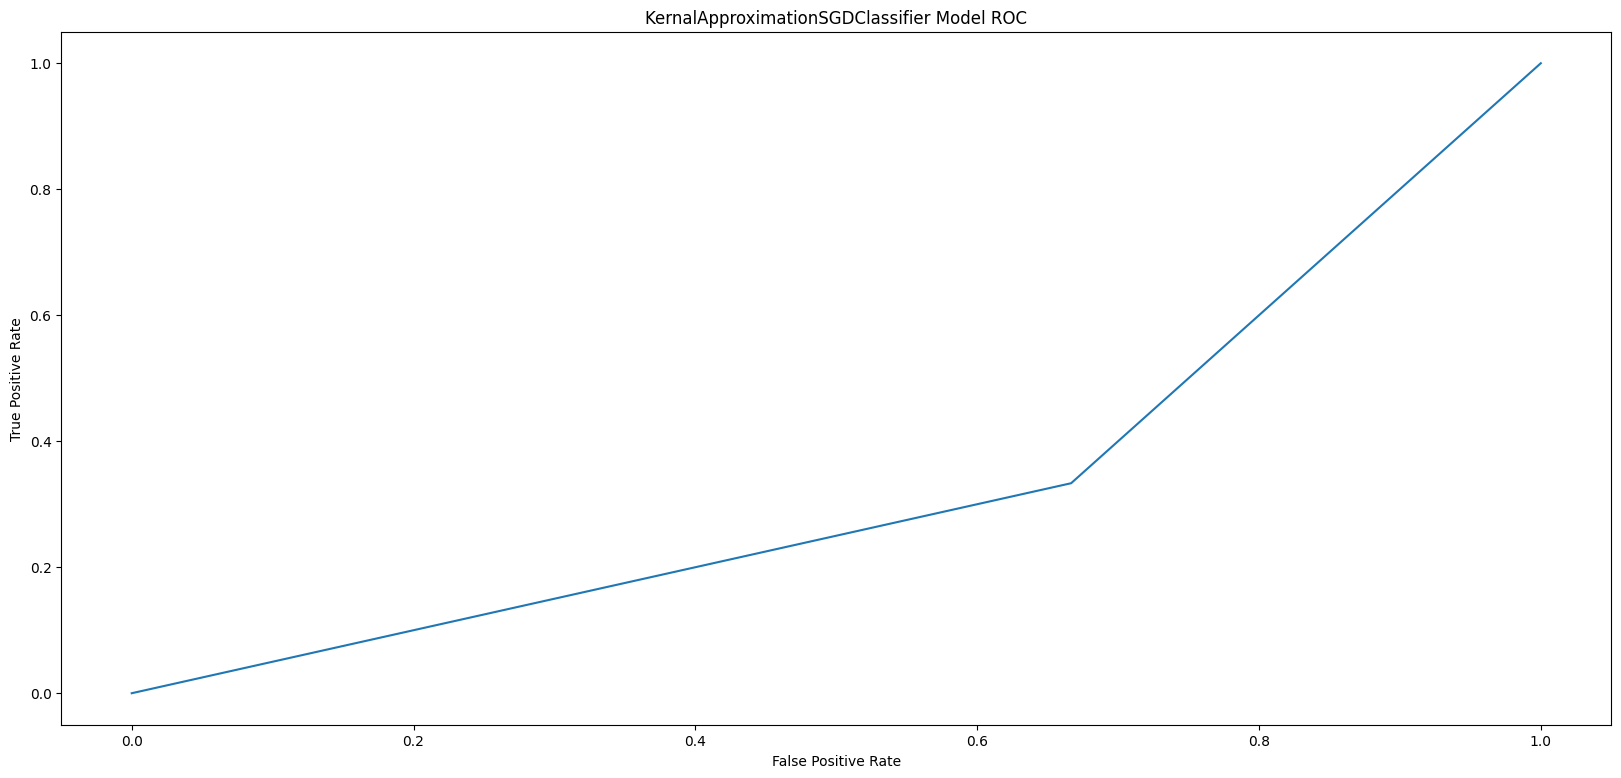

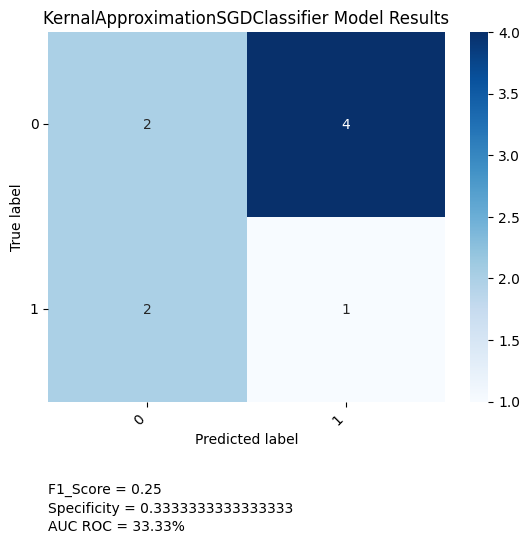

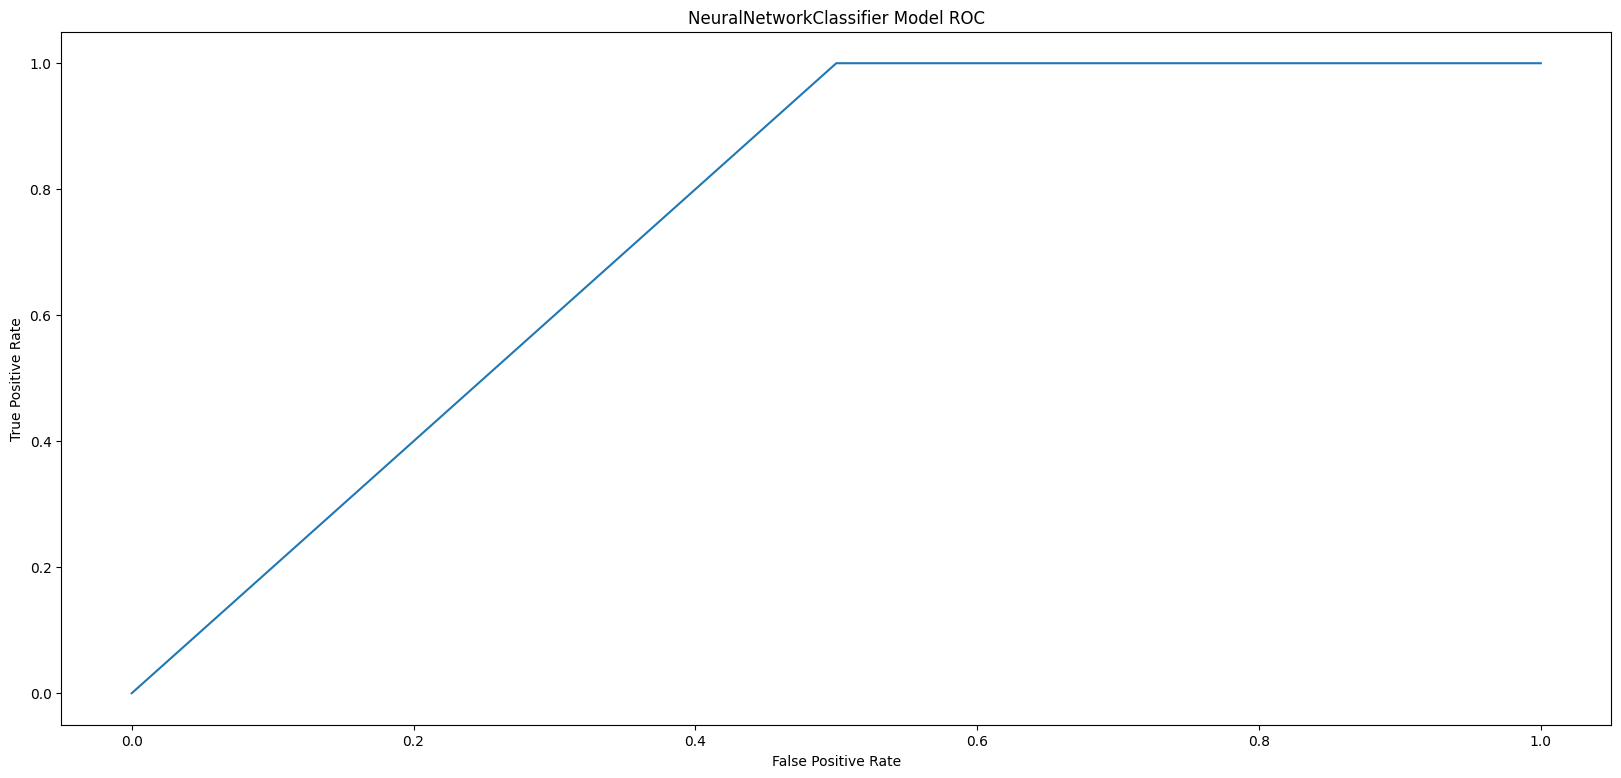

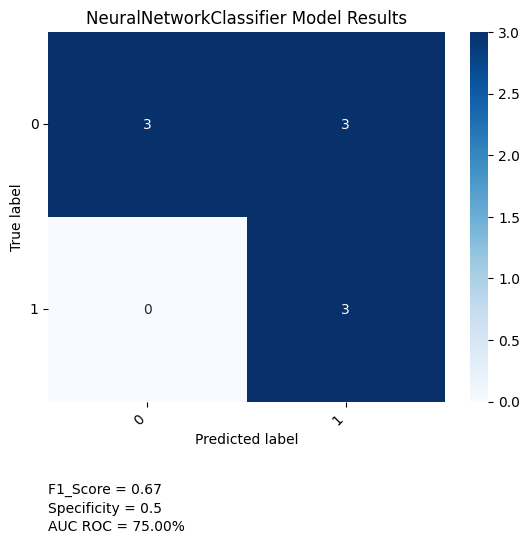

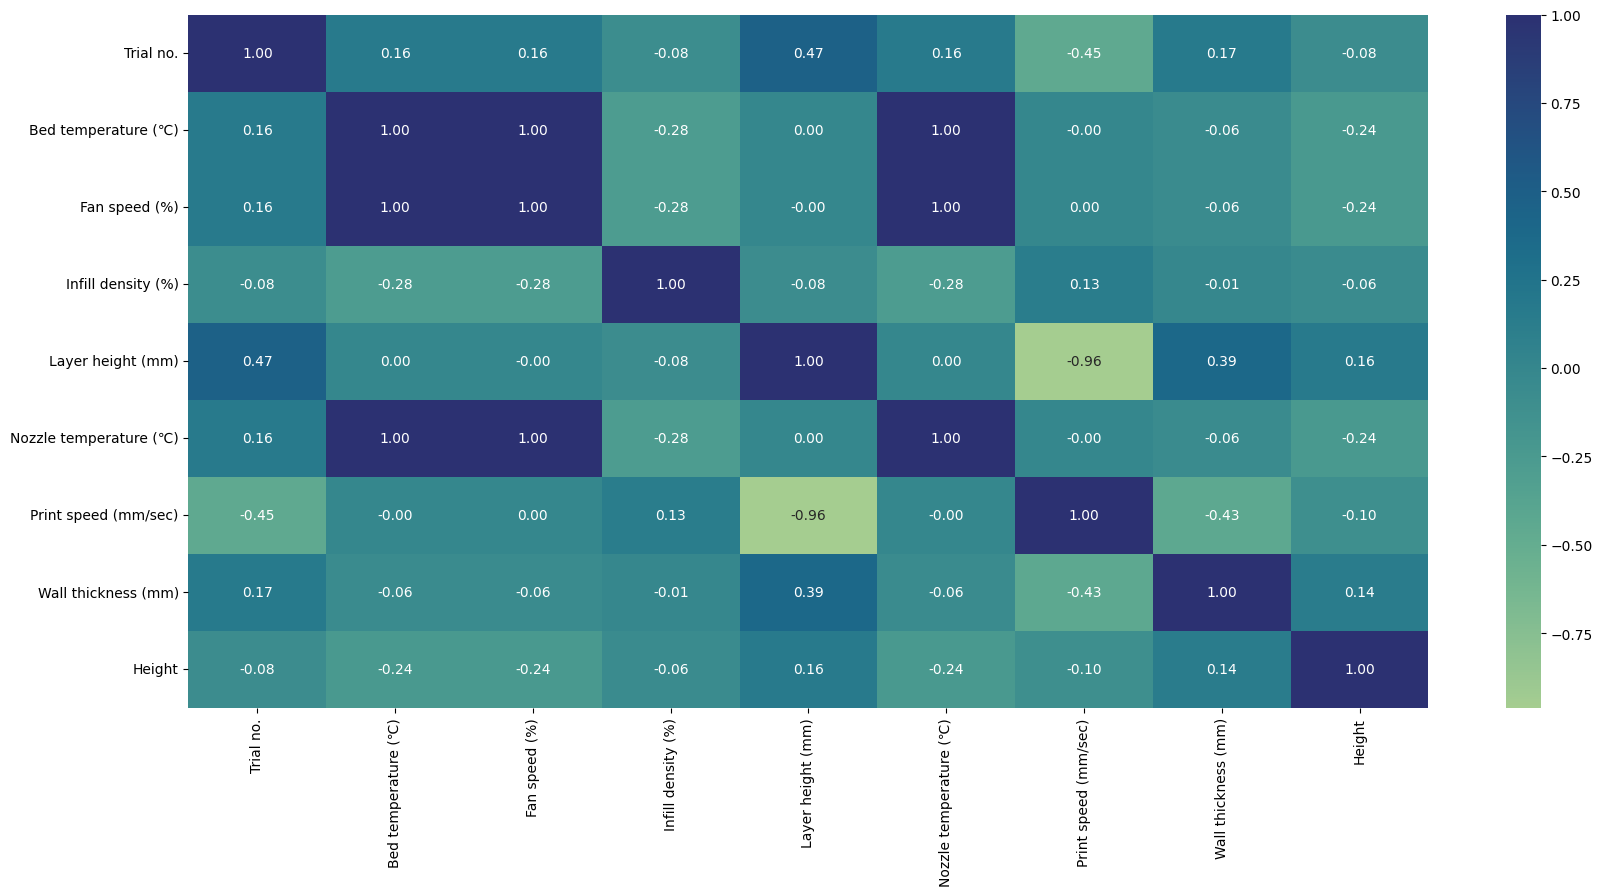

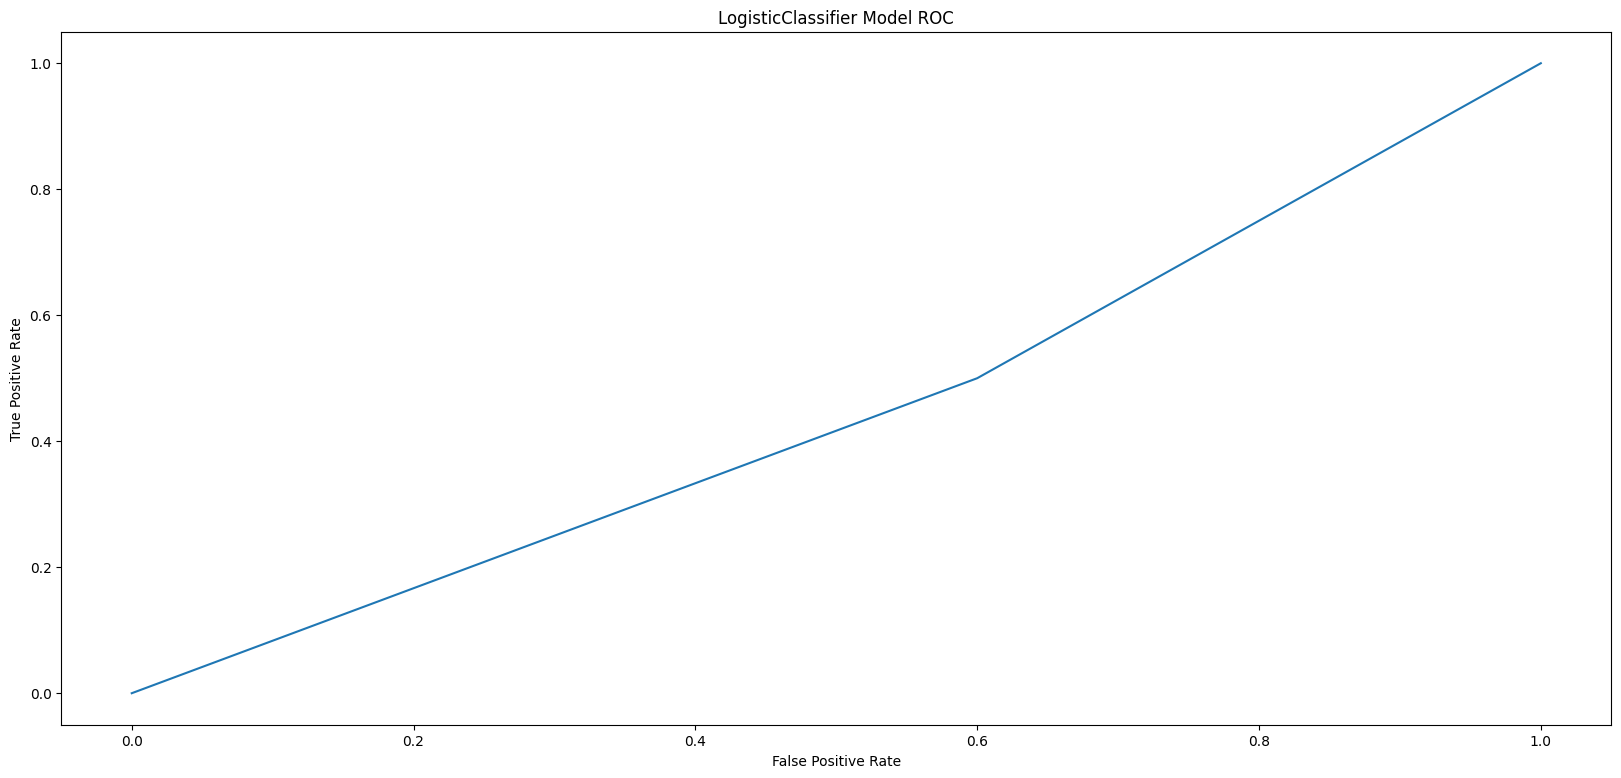

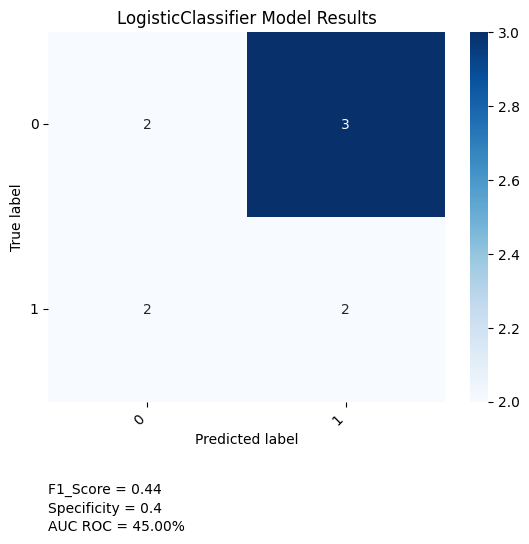

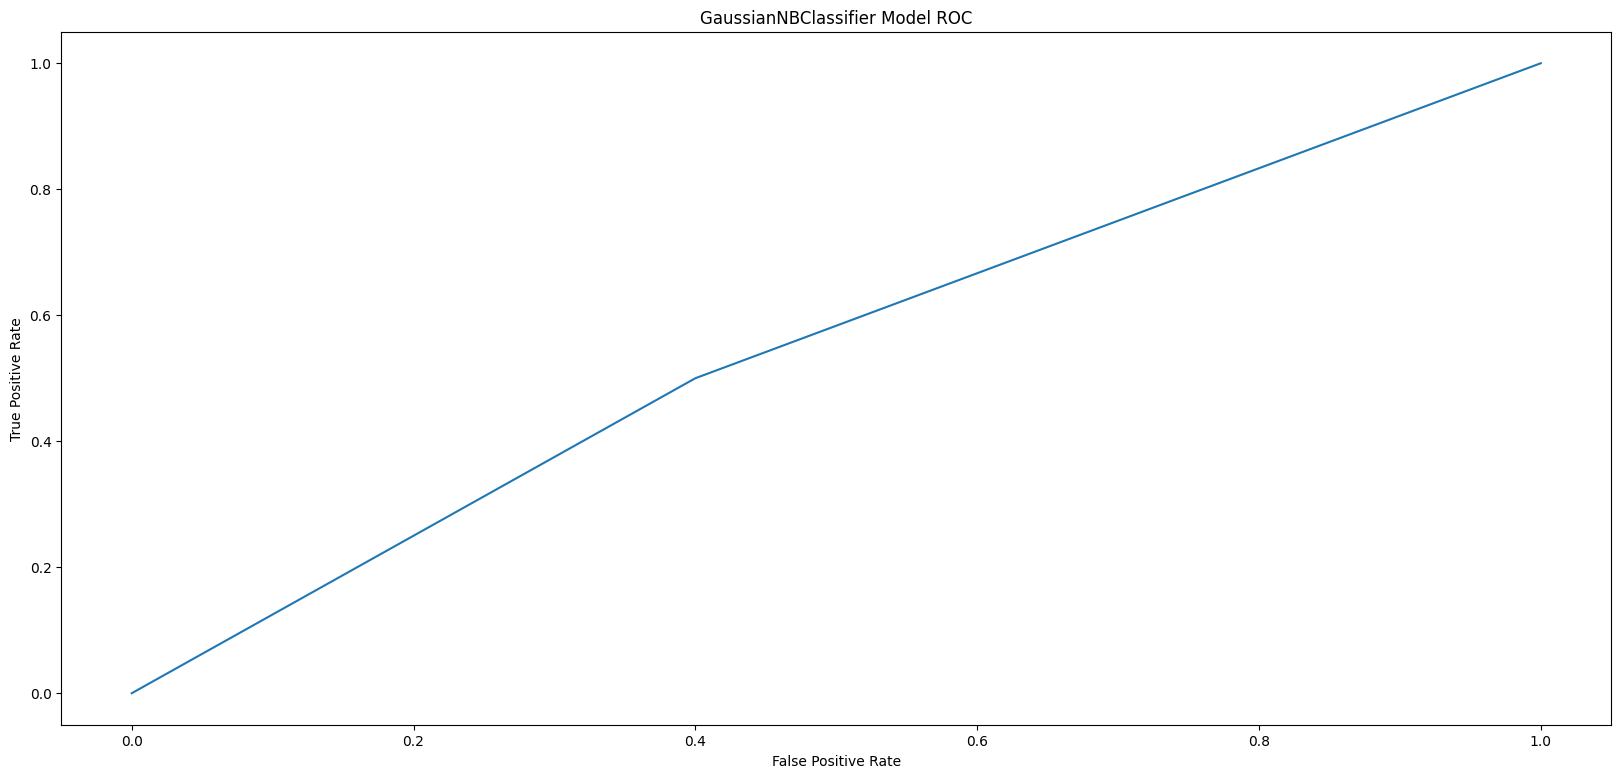

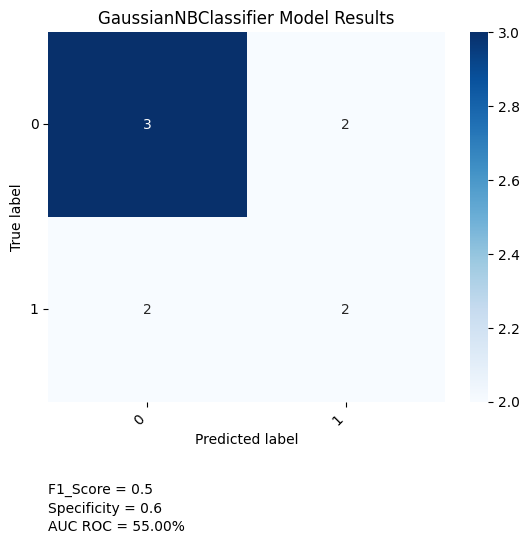

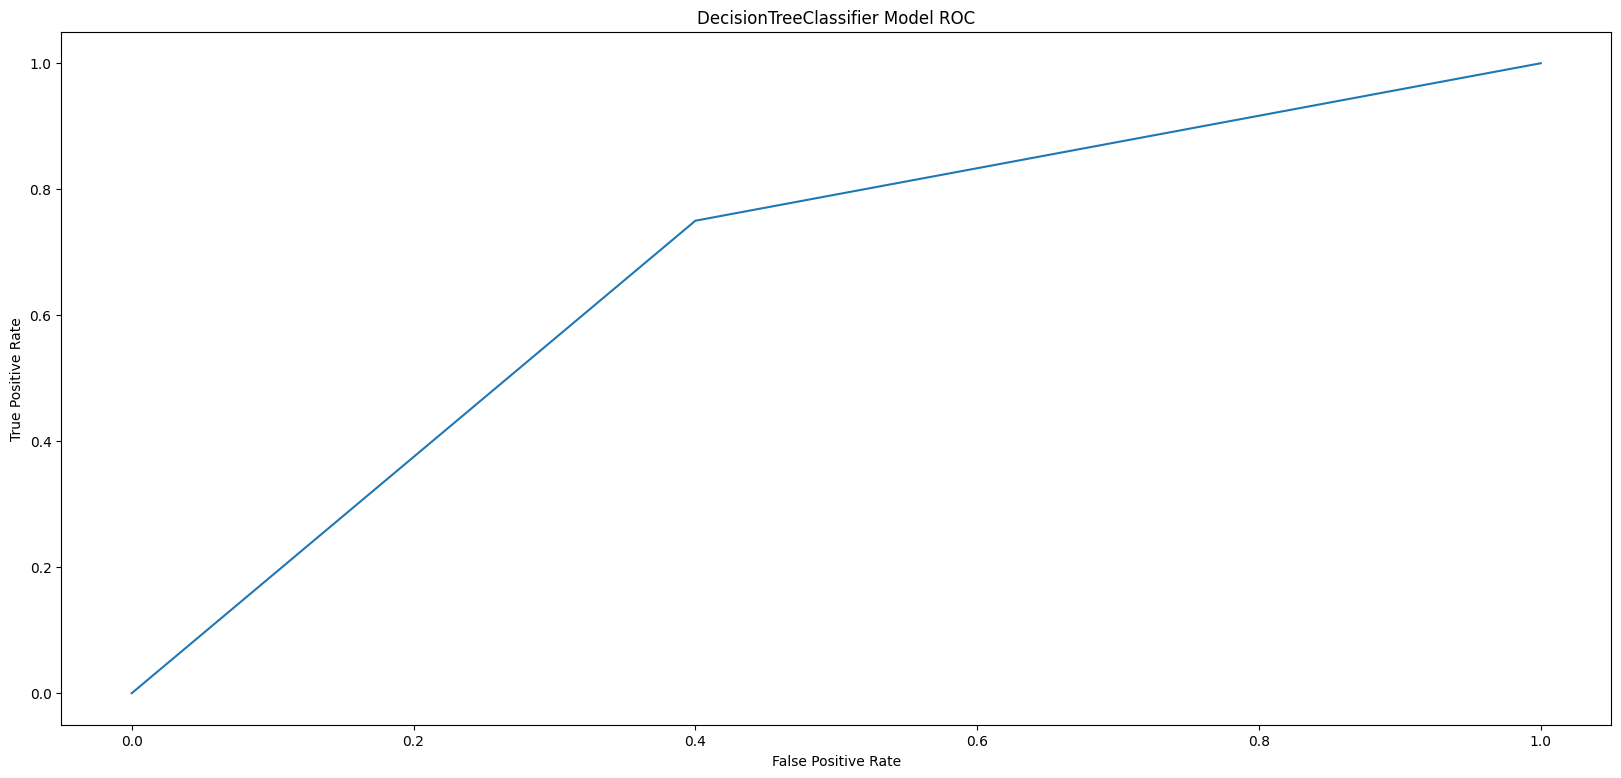

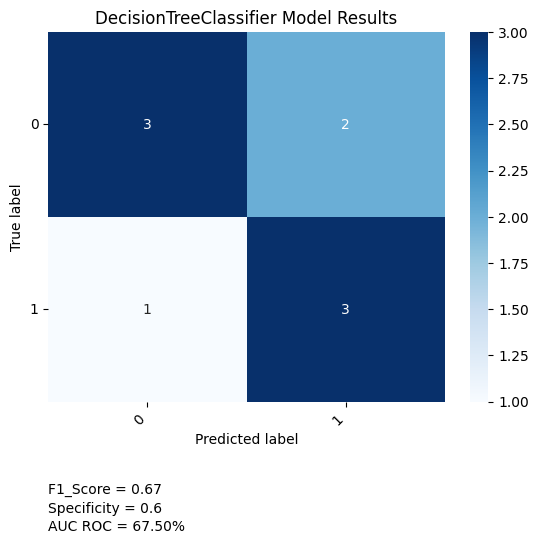

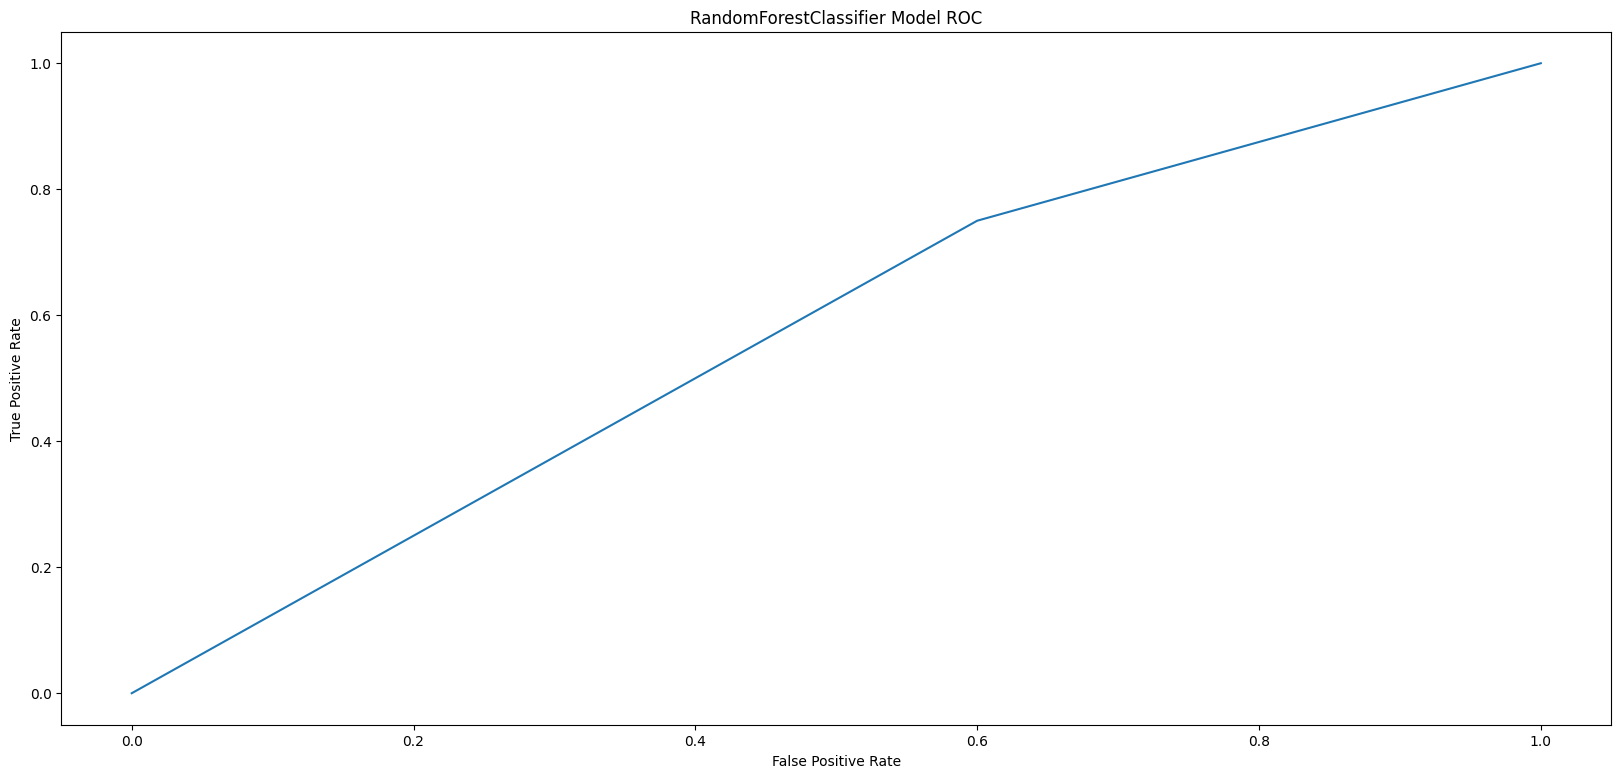

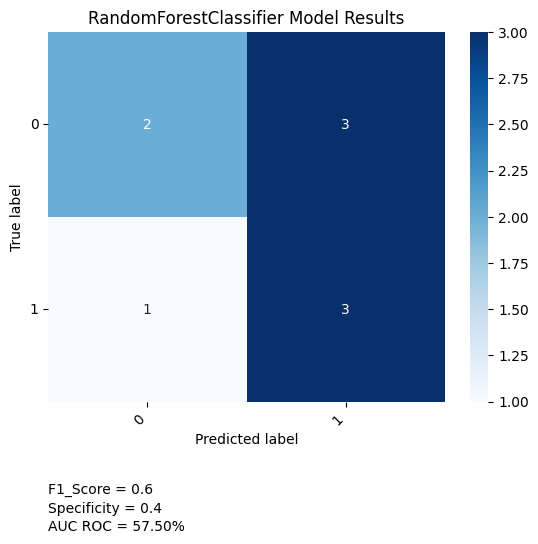

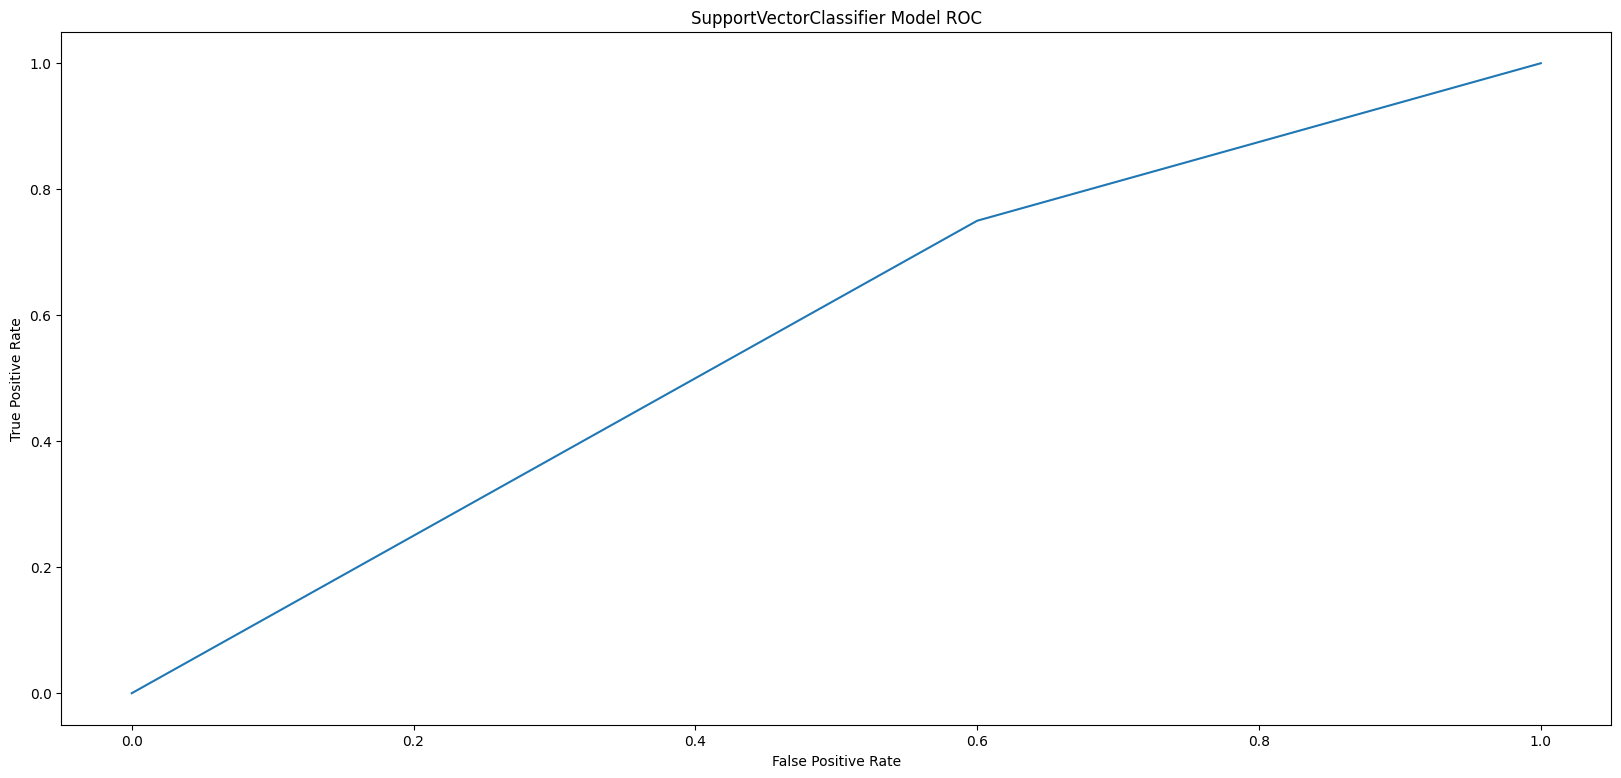

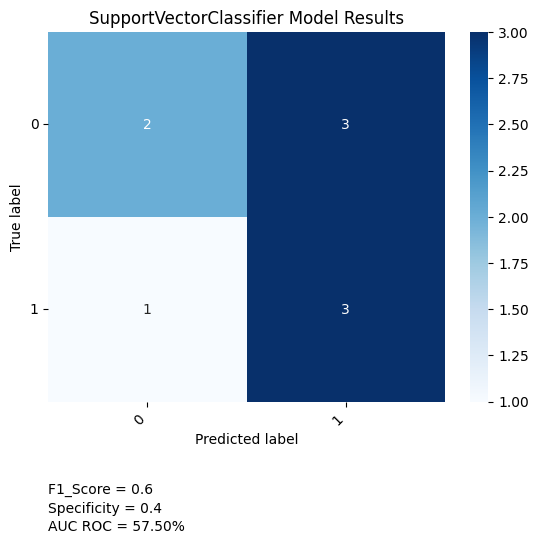

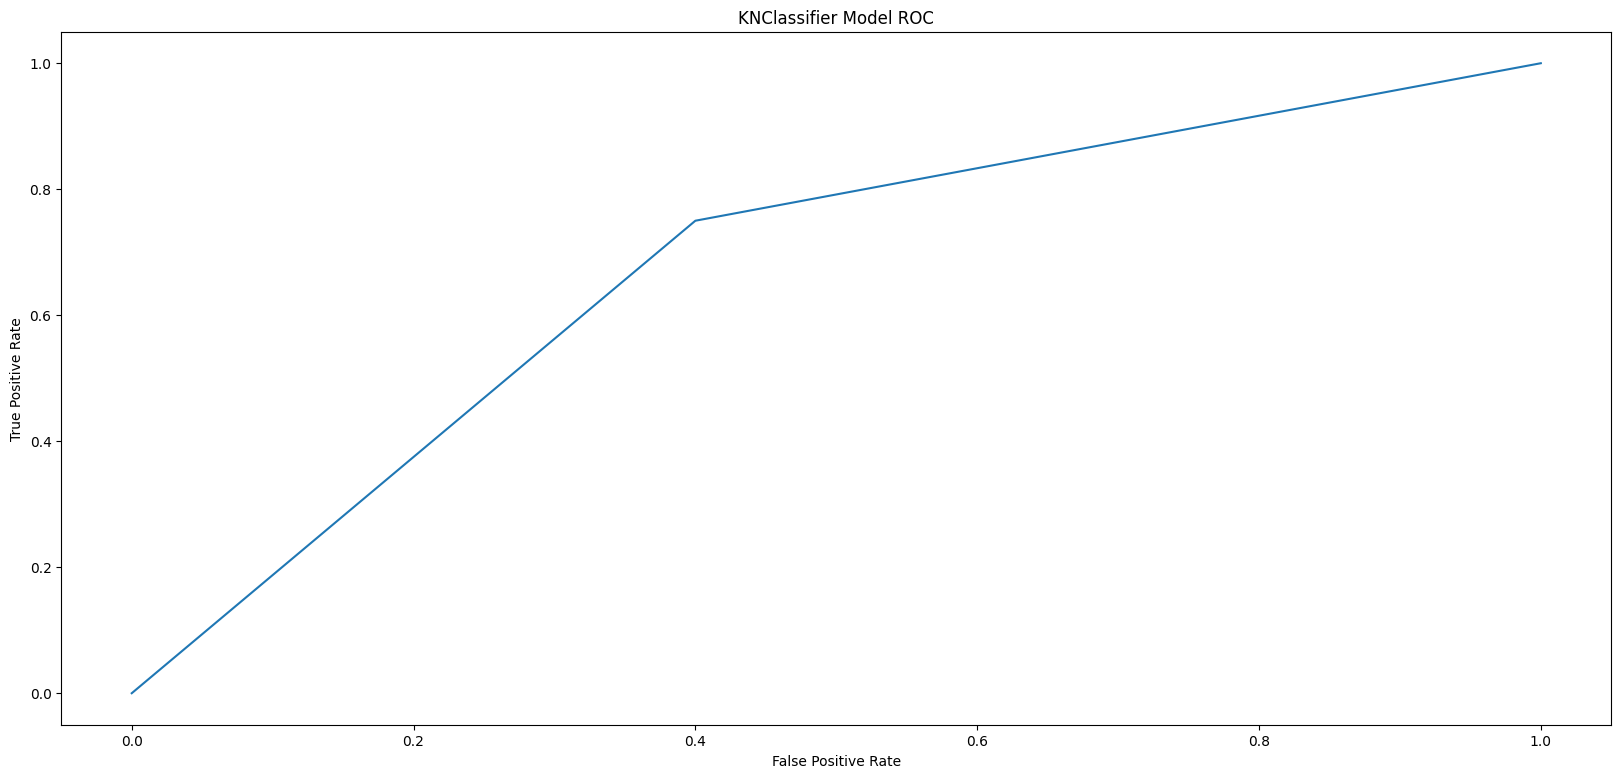

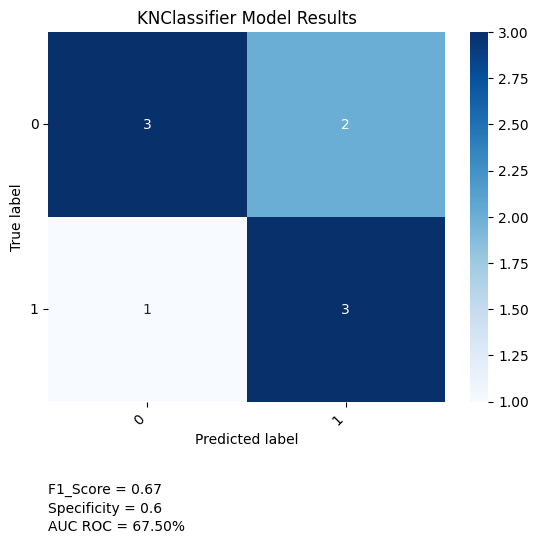

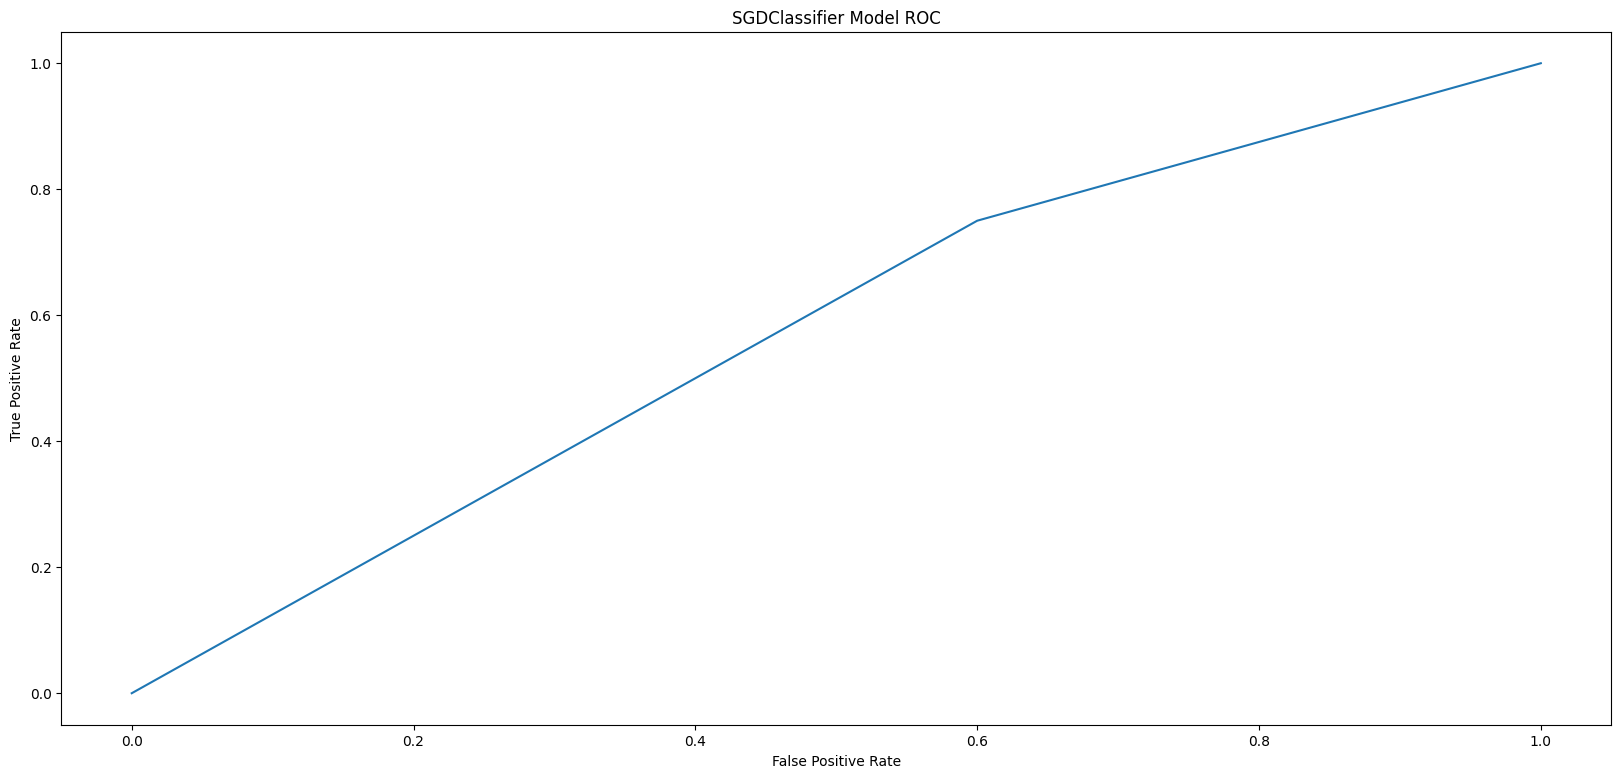

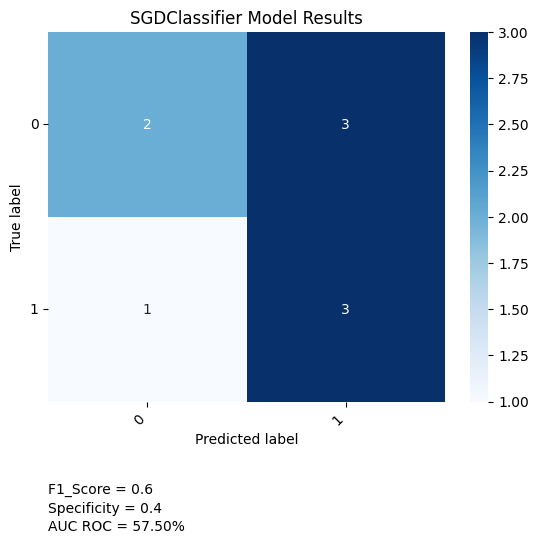

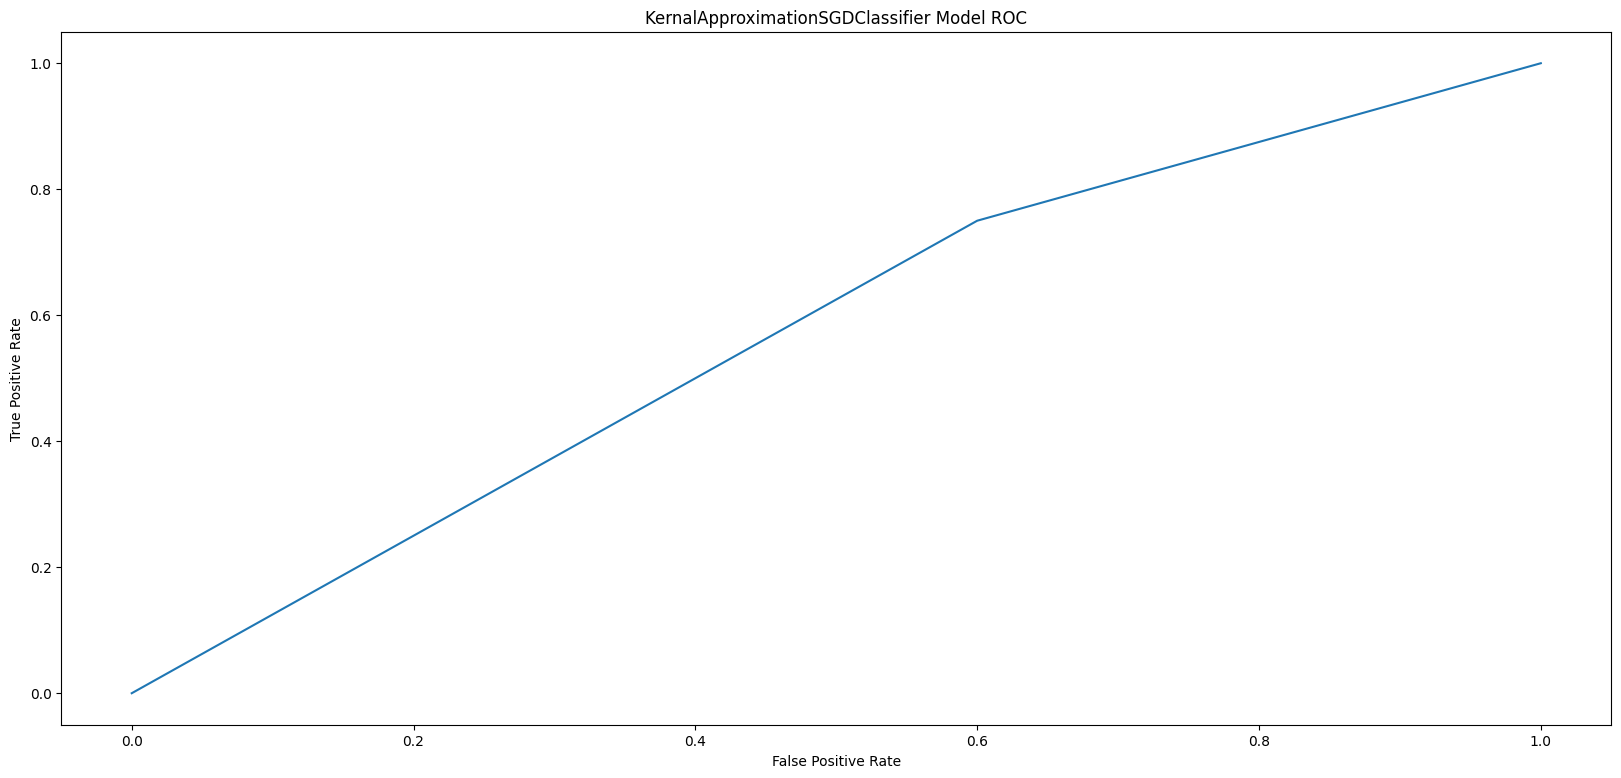

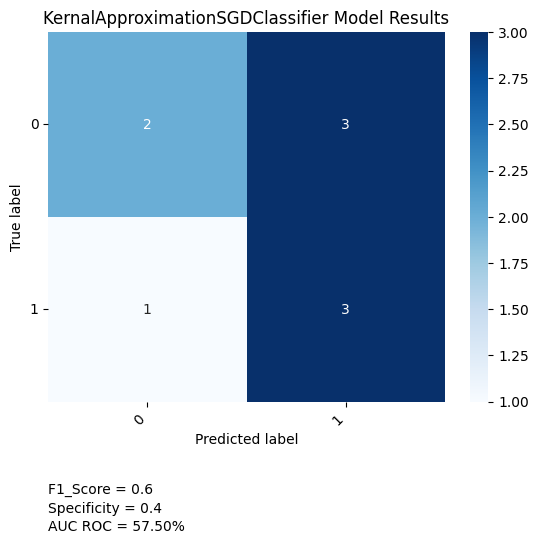

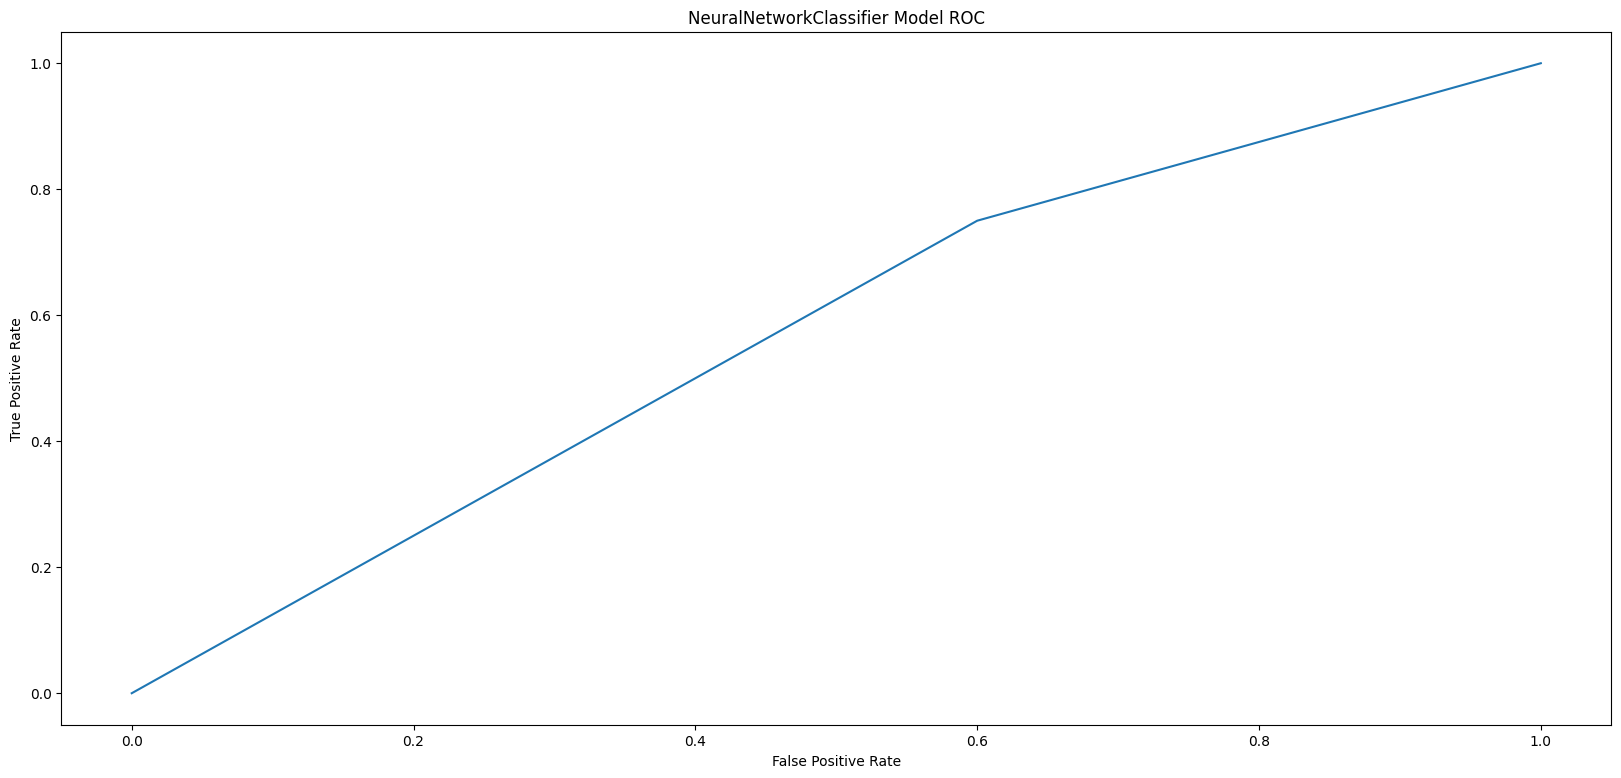

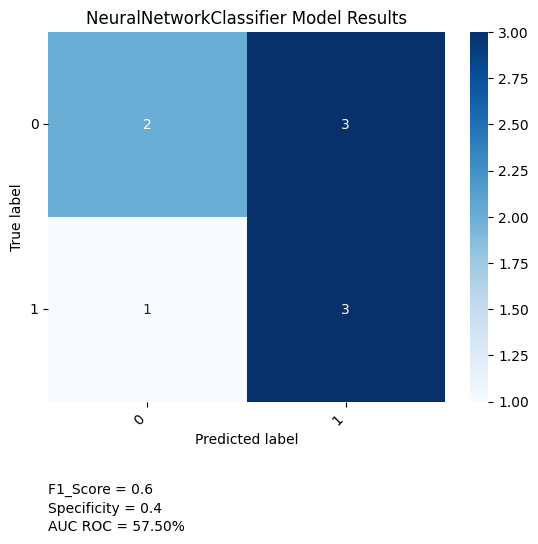

In [ ]:
writer = pd.ExcelWriter('ClassificationPredictionResults.xlsx', engine='openpyxl')
for sheet_name, dataset in dataset_dict.items():
    classy = TheClassifier(dataset=dataset,sheet_name=sheet_name)
    classy.find_corr()
    classy.process_dataset(split_size=0.3)
    s = classy.write_preds()
    s.to_excel(writer,sheet_name=sheet_name)
writer.save()
writer.close()